

<img src="data/mundo06.png" style="display: block; margin: 0 auto; width: 80%;">
    <font size="12"><p style="font-family: 'Tahoma', cursive, sans-serif;text-align:center;font-weight:bold;color: #4b0082;">
    Mie  Taira,  Carmen  Rey,  Daniel  Tummler</p></font>
<br />
<br />



<div class = "alert alert-block alert-success">
0. Motivaciones del proyecto.
</div>

Hemos intentado continuar con nuestra temática de investigación sobre **cancer** pero no hemos podido conseguir un dataset adecuado. 

Finalmente después de muchas búsquedas hemos localizado un dataset sobre **healthcare** para tratar de **predecir el diagnostico anticipado de la diabetes** según datos de una encuesta anual sobre indicadores de salud en EEUU.












<div class="alert alert-block alert-warning">
Herramientas y tecnologías utilizadas
</div>


<table>
  <tr>
    <td><img src="data/pandas.png" style="width: 300px;"></td>
    <td><img src="data/seaborn.png" style="width: 300px;"></td>
    <td><img src="data/matplotlib1.png" style="width: 300px;"></td>
  </tr>
  <tr>
    <td><img src="data/ipython1.png" style="width: 300px;"></td>
    <td><img src="data/sklearn1.webp" style="width: 300px;"></td>
    <td><img src="data/numpy1.png" style="width: 300px;"></td>
  </tr>
</table>


In [1]:
### Importando librerías
import time
inicio = time.time()

import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display, HTML
from mlxtend.plotting import plot_confusion_matrix
from pandas_profiling import ProfileReport


from sklearn.tree import plot_tree
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression, SGDClassifier

from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  accuracy_score, recall_score, precision_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split, LeaveOneOut, KFold, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, IsolationForest, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

warnings.filterwarnings('ignore')

In [1]:
# !pip install Humor Sans
# !pip install xkcd
# !pip install xgboost
# !pip install pandas_profiling
# !pip install mlxtend

     -------------------------------------- 634.6/634.6 kB 3.3 MB/s eta 0:00:00
     ---------------------------------------- 3.6/3.6 MB 4.4 MB/s eta 0:00:00
     ---------------------------------------- 56.8/56.8 kB 2.9 MB/s eta 0:00:00
  Attempting uninstall: lxml
    Found existing installation: lxml 4.9.1
    Uninstalling lxml-4.9.1:
      Successfully uninstalled lxml-4.9.1
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for xkcd: filename=xkcd-2.4.2-py3-none-any.whl size=9179 sha256=d4a67cd28ced1e61b7b02b62839b2dd71705266ee439404dcc3f380a1ffd8d2e
  Stored in directory: c:\users\tester\appdata\local\pip\cache\wheels\38\92\b7\c88eb266b908b4f42e6f8df7a2c14fed98aaaf75d0cecf478c
Successfully built xkcd
     ---------------------------------------- 89.1/89.1 MB 7.3 MB/s eta 0:00:00
     -------------------------------------- 328.8/328.8 kB 4.1 MB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 

     ---------------------------------------- 1.3/1.3 MB 3.1 MB/s eta 0:00:00


<div class = "alert alert-block alert-success">
1. Definir el problema ¿Qué es la diabetes?
</div>

Según la OMS la diabetes es una **enfermedad metabólica crónica** (de larga duración) que afecta la forma en que el cuerpo convierte los alimentos en energía. Se caracterizada por **niveles elevados de glucosa en sangre** (o azúcar en sangre), el cuerpo descompone la mayor parte de los alimentos que come en azúcar (también llamada glucosa) y no genera suficiente insulina para procesarla. Con el tiempo la diabetes conduce a daños graves en el corazón, los vasos sanguíneos, los ojos, los riñones y los nervios. La más común es la diabetes tipo 2, generalmente en adultos, que ocurre cuando **el cuerpo se vuelve resistente a la insulina** o no produce suficiente insulina. En las últimas tres décadas, la prevalencia de la diabetes tipo 2 ha aumentado drásticamente en países de todos los niveles de ingresos. El acceso a la insulina es fundamental para la supervivencia de estos enfermos. Existe un **objetivo acordado a nivel mundial para detener el aumento de la diabetes y la obesidad para 2025**.

El punto de partida para vivir bien con diabetes es un **diagnóstico temprano**. Y es aquí donde los modelos de Machine Learning nos pueden ayudar. 



¿Es una regresión o una clasificación?

Los modelos que mejor se ajustan son los de **clasificación** para un elevado número de datos.

¿Qué datos son necesarios para predecir esa variable? 

**Hábitos del comportamiento** y consumo alimentario que aumenten la posibilidad de glucosa en sangre, como la frecuencia con que realiza ejercicio, la ingesta de calorías diarias, su índice de masa corporal, el tipo de dieta, los controles médicos y la frecuencia con que los hace, el colesterol, las enfermedades cardíacas y respiratorias... etc.



En nuestro dataset tenemos **253680 resgistros con las siguientes 22 features** que son indicadores de la enfermedad:
<table style="font-size:x-small; width='10%'">
    <tr><td style="text-align:left;">'Diabetes_012',         </td><td style="text-align:left;">si padece la enfermedad de diabetes</td></tr>
    <tr><td style="text-align:left;">'HighBP',               </td><td style="text-align:left;">Presion arterial alta</td></tr>
    <tr><td style="text-align:left;">'HighChol',             </td><td style="text-align:left;">Colesterol elevado</td></tr>
    <tr><td style="text-align:left;">'CholCheck',            </td><td style="text-align:left;">Chequeos de colesterol</td></tr>
    <tr><td style="text-align:left;">'BMI',                  </td><td style="text-align:left;">índice de masa corporal</td></tr>
    <tr><td style="text-align:left;">'Smoker',               </td><td style="text-align:left;">si es fumador</td></tr>
    <tr><td style="text-align:left;">'Stroke',               </td><td style="text-align:left;">si ha tenido ataques al corazón</td></tr>
    <tr><td style="text-align:left;">'HeartDiseaseorAttack', </td><td style="text-align:left;">si padece enfermedades cardíacas</td></tr>
    <tr><td style="text-align:left;">'PhysActivity',         </td><td style="text-align:left;">nivel de actividad física</td></tr>
    <tr><td style="text-align:left;">'Fruits',               </td><td style="text-align:left;">consumo de frutas</td></tr>
    <tr><td style="text-align:left;">'Veggies',              </td><td style="text-align:left;">consumo de vegetales</td></tr>
    <tr><td style="text-align:left;">'HvyAlcoholConsump',    </td><td style="text-align:left;">consumidor frecuente de alcohol</td></tr>
    <tr><td style="text-align:left;">'AnyHealthcare',        </td><td style="text-align:left;">algún cuidado médico</td></tr>
    <tr><td style="text-align:left;">'NoDocbcCost',          </td><td style="text-align:left;">sin visitar doctor por elevado coste</td></tr>
    <tr><td style="text-align:left;">'GenHlth',              </td><td style="text-align:left;">salud general</td></tr>
    <tr><td style="text-align:left;">'MentHlth',             </td><td style="text-align:left;">salud mental</td></tr>
    <tr><td style="text-align:left;">'PhysHlth',             </td><td style="text-align:left;">salud física</td></tr>
    <tr><td style="text-align:left;">'DiffWalk',             </td><td style="text-align:left;">dificultad para caminar</td></tr>
    <tr><td style="text-align:left;">'Sex',                  </td><td style="text-align:left;">sexo</td></tr>
    <tr><td style="text-align:left;">'Age',                  </td><td style="text-align:left;">edad</td></tr>
    <tr><td style="text-align:left;">'Education',            </td><td style="text-align:left;">nivel educativo</td></tr>
    <tr><td style="text-align:left;">'Income'                </td><td style="text-align:left;">ingresos</td></tr>
</table>


 Las posibles respuestas están categorizadas en la encuesta del siguiente modo:
<center>
<img src="data/posiblesrespuestas.png" style="width: 700px;">
</center>


Vamos a tratar de **predecir** la columna denominada **[diabetes_012]** cuyos valores son:
* **0**  si está sano o sólo la ha tenido diabetes durante el embarazo,
* **1**  si tiene un diagnóstico de prediabetes, osea, es propenso a desarrollar la enfermedad y 
* **2**  si tiene un diagnóstico de diabetes.


In [3]:
df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

In [5]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<div class = "alert alert-block alert-success">
2. Recopilación de Datos
</div>

Una de las etapas más difíciles de todo proyecto.
Nuestra fuente de información ha sido **Kaggle**: 

https://www.kaggle.com/code/alexteboul/diabetes-health-indicators-dataset-notebook 

Hemos localizado un dataset sobre diabetes procedente del **CDC** estadounidense (centers for disease control and prevention) que recoge la información obtenida por medio del **"Behavioral Risk Factor Surveillance System" = BRFSS** que es el sistema de encuestas de salud telefónicas más grande del mundo, que rastrea los riesgos para la salud en los Estados Unidos y cuyos datos son de acceso público.

https://www.cdc.gov/brfss/annual_data/annual_2015.html 



Con los resultados obtenidos analizando la encuesta se ha publicado el siguiente paper: 

https://www.cdc.gov/pcd/issues/2019/19_0109.htm




<div class="alert alert-block alert-warning">
 Desafíos en cada parte del proceso.
</div>

¿Cómo tratamos los **outliers**? ¿Qué datos son outliers?¿Existen realmente los valores duplicados?

¿Cómo categorizamos al grupo (1), con **diagnóstico de prediabetes**, ¿se añaden al grupo de personas sanas (0), sin diabetes o al grupo de personas enfermas (2) con diabetes?. Opiniones dispares. 

Las 3 poblaciones están muy **desbalanceadas**.
<img src="data/tarta.png" style="display: block; margin: 0 auto; width: 42%;">
    <br />



<div class="alert alert-block alert-warning">
Resolución de cada desafío o problema.
</div>

* Primero **eliminamos** al grupo 1, prediabetes, que representa un 2% de los datos
* Después **reetiquetamos** a los enfermos con diabetes como nuevo grupo "1"
* Finalmente hacemos **oversampling** de la población enferma y un **undersampling** de la población sana.
<table>
    <tr>
        <td><img src="data/preoversampling.png" style="display: block; margin: 0 auto; width: 70%"></td>
        <td><img src="data/postoversampling.png" style="display: block; margin: 0 auto; width: 70%"></td>
    </tr>
</table>
* Como no nos poníamos de acuerdo sobre los **outliers**, delegamos la decisión a las máquinas, usando **Isolation Forest** para detectar anomalías en los datos, agruparlas y eliminarlas.

<div class = "alert alert-block alert-success">
3. Exploratory Data Analysis (EDA) y Procesamiento de Datos
</div>

<div class="alert alert-block alert-warning">
Un esquema de lo que fue el proyecto.
</div>

<img src="data/Conseguir diabetes dataset.png" style="display: block; margin: 0 auto; width: 15%;">

https://gitmind.com/app/docs/mkh17tze


Cuantos valores hay por encima de 50, considerado doble obesidad morbida u obesidad extrema (grado 4)
       
        Bajo peso: IMC <18,5 kg/m2
        Normopeso: IMC 18,5 - 24,9 kg/m2
        Sobrepeso: IMC 25 -29 kg/m2
        Obesidad grado 1: IMC 30-34 kg/m2
        Obesidad grado 2: IMC 35-39,9 kg/m2
        Obesidad grado 3 u obesidad mórbida: IMC 40-49,9 kg/m2
        Obesidad grado 4 u obesidad extrema: IMC >50 kg/m2


<div class = "alert alert-block alert-success">
4. Modelos, Métricas y Métodos de Validación
</div>

En esta etapa vamos a implementar los siguientes modelos de Machine Learning, que en nuestro caso, son casi todos modelos de clasificación:

            Logistic Regression
            Random Forest
            Ada Boost: Adaptive Boosting
            Extra-Trees Clasifier: Extremely Randomized Trees
            SGD: Stochastic Gradient Descent Algorithm
            Gradient Boosting Classifier

Entrenamos los modelos, calculamos todas las **métricas** y dependiendo de las estadísticas que aporta el **ClassificationReport** vamos a seleccionar el modelo que mejor predice la diabetes con nuestros datos.

Como método de validación hemos utilizado **GridSearchCV**.

Terminamos probando el modelo con valores nuevos para ver qué tal funciona.



Como existe un paper publicado con los mismos datos nos gustaría tratar de reproducir sus resultados:

<img src="data/table1.png" style="display: block; margin: 0 auto; width: 60%;">

Nuestros resultados han sido los siguientes:

<img src="data/resultados.png" style="display: block; margin: 0 auto; width: 60%;">


<table>
    <tr>
         <td> Logistic Regression</td>
         <td> Decision Tree</td>
         <td> Random Forest</td>
    </tr>
    <tr>      
        <td><img src="data/cm1.png" style="width: 275px;"></td>
        <td><img src="data/cm2.png" style="width: 275px;"></td>
        <td><img src="data/cm3.png" style="width: 275px;"></td>
    </tr>
    <tr>
         <td> K-Nearest Neighbors</td>
         <td> SVM </td>
         <td> Ada Boost</td>
    </tr>
    <tr>
        <td><img src="data/cm4.png" style="width: 275px;"></td>
        <td><img src="data/cm5.png" style="width: 275px;"></td>
        <td><img src="data/cm6.png" style="width: 275px;"></td>
    </tr>
    <tr>
         <td> Extra Tree Classifier</td>
         <td> SGD </td>
         <td> XGBoost </td>
    </tr>
    <tr>
        <td><img src="data/cm7.PNG" style="width: 275px;"></td>
        <td><img src="data/cm8.PNG" style="width: 275px;"></td>
        <td><img src="data/cm9.PNG" style="width: 275px;"></td>
    </tr>
</table>

   

<table>
  <tr>
     <td> Logistic Regression</td>
     <td> Decision Tree</td>
     <td> Random Forest</td>
 </tr>
 <tr>      
    <td><img src="data/LogisticRegressionreport.PNG" style="width: 400px;"></td>
    <td><img src="data/decisiontreereport.PNG" style="width: 400px;"></td>
    <td><img src="data/randomforestreport.PNG" style="width: 400px;"></td>
  </tr>
    <tr>
     <td> K-Nearest Neighbors</td>
     <td> SVM </td>
     <td> Ada Boost</td>
  </tr>
  <tr>
    <td><img src="data/KNearestneighborsreport.PNG" style="width: 400px;"></td>
    <td><img src="data/svcreport.PNG"" style="width: 400px;"></td>
    <td><img src="data/AdaBoostreport.PNG" style="width: 400px;"></td>
  </tr>
  <tr>
     <td> Extra Tree Classifier</td>
     <td> SGD </td>
     <td> XGBoost </td>
 </tr>
  <tr>
    <td><img src="data/ExtraTreesClassifierreport.PNG" style="width: 400px;"></td>
    <td><img src="data/sgdreport.PNG"" style="width: 400px;"></td>
    <td><img src="data/XGBoostreport.PNG" style="width: 400px;"></td>
  </tr>
</table>


<table>
    <tr>
         <td> 0: Logistic Regression</td>
         <td> 1: Random Forest</td>
         <td> 2: AdaBoost Classifier</td>
    </tr>
    <tr>      
        <td><img src="data/coma0.png" style="width: 450px;"></td>
        <td><img src="data/coma1.png" style="width: 450px;"></td>
        <td><img src="data/coma2.png" style="width: 450px;"></td>
    </tr>
    <tr>
         <td> 3: Extremely Randomized Trees</td>
         <td> 4: SGD Classifier</td>
         <td> 5: Gradient Boosting Classifier</td>
    </tr>
    <tr>
        <td><img src="data/coma3.png" style="width: 450px;"></td>
        <td><img src="data/coma4.png" style="width: 450px;"></td>
        <td><img src="data/coma5.png" style="width: 450px;"></td>
    </tr>        
</table>

<table>
    <tr>
         <td> 0: Logistic Regression</td>
         <td> 1: Random Forest</td>
         <td> 2: AdaBoost Classifier</td>
    </tr>
    <tr>      
        <td><img src="data/report0.png" style="width: 700px;"></td>
        <td><img src="data/report1.png" style="width: 700px;"></td>
        <td><img src="data/report2.png" style="width: 700px;"></td>
    </tr>
    <tr>
         <td> 3: Extremely Randomized Trees</td>
         <td> 4: SGD Classifier</td>
         <td> 5: Gradient Boosting Classifier</td>
    </tr>
    <tr>
        <td><img src="data/report3.png" style="width: 700px;"></td>
        <td><img src="data/report4.png" style="width: 700px;"></td>
        <td><img src="data/report5.png" style="width: 700px;"></td>
    </tr>        
</table>

<div class = "alert alert-block alert-success">
5. Resultados y Conclusiones
</div>

**Extremely Randomized Trees Classifier** (3) es el modelo que mejor funciona (mayor recall y accuracy), **Random Forest** (1) y **Gradient Boosting Classifier** (5) tienen comportamientos muy similares.   

<img src="data/com-recall.png" style="display: block; margin: 0 auto; width: 75%;">




Para terminar, probamos los modelos con datos completamente nuevos (x_val , y_val) y obtenemos resultados muy similares a los anteriores.
<br />
<img src="data/new-recall.png" style="display: block; margin: 0 auto; width: 85%;">



Conclusiones:
    
* Hombres y mujeres son igualmente vulnerables a la diabetes.

* Las personas mayores de 45 años son más vulnerables a la diabetes que los más jóvenes.

* Más de la mitad de los diabéticos y  casi la mitad de los prediabéticos son obesos.

* Cuando la educación mejora, el número de personas diabéticas disminuye.

* Las personas con ingresos más bajos tienen más riesgo de diabetes.

* La salud general tiene un efecto importante sobre la diabetes. 
   Cuando no es buena, el riesgo de diabetes aumenta rápidamente.

* La actividad física reduce el riesgo de diabetes.

* Comer al menos una fruta y una verdura al día reduce el riesgo de diabetes.

<img src="data/dieta-rica-fibra-vida-silver-scaled.jpg" style="display: block; margin: 0 auto; width: 75%;">

In [5]:
# Código de un notebook de kaggle donde podemos ver cómo se obtienen nuestros datos:


# ## read in the dataset (select 2015)
# year = '2015'
# brfss_2015_dataset = pd.read_csv(f'../input/behavioral-risk-factor-surveillance-system/{year}.csv')

# #How many rows and columns
# brfss_2015_dataset.shape

# #check that the data loaded in is in the correct format
# pd.set_option('display.max_columns', 500)
# brfss_2015_dataset.head()

# **At this point we have 441,456 records and 330 columns. Each record contains an individual's BRFSS survey responses.**

# # select specific columns
# brfss_df_selected = brfss_2015_dataset[['DIABETE3',
#                                          '_RFHYPE5',  
#                                          'TOLDHI2', '_CHOLCHK', 
#                                          '_BMI5', 
#                                          'SMOKE100', 
#                                          'CVDSTRK3', '_MICHD', 
#                                          '_TOTINDA', 
#                                          '_FRTLT1', '_VEGLT1', 
#                                          '_RFDRHV5', 
#                                          'HLTHPLN1', 'MEDCOST', 
#                                          'GENHLTH', 'MENTHLTH', 'PHYSHLTH', 'DIFFWALK', 
#                                          'SEX', '_AGEG5YR', 'EDUCA', 'INCOME2' ]]

# brfss_df_selected.shape

# brfss_df_selected.head()

# ## 2. Clean the data

# ### 2.1 Drop missing values

# #Drop Missing Values - knocks 100,000 rows out right away
# brfss_df_selected = brfss_df_selected.dropna()
# brfss_df_selected.shape

# ### 2.2 Modify and clean the values to be more suitable to ML algorithms
# In order to do this part, I referenced the codebook which says what each column/feature/question is: https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf

# # DIABETE3
# # going to make this ordinal. 0 is for no diabetes or only during pregnancy, 1 is for pre-diabetes or borderline diabetes, 2 is for yes diabetes
# # Remove all 7 (dont knows)
# # Remove all 9 (refused)
# brfss_df_selected['DIABETE3'] = brfss_df_selected['DIABETE3'].replace({2:0, 3:0, 1:2, 4:1})
# brfss_df_selected = brfss_df_selected[brfss_df_selected.DIABETE3 != 7]
# brfss_df_selected = brfss_df_selected[brfss_df_selected.DIABETE3 != 9]
# brfss_df_selected.DIABETE3.unique()

# #1 _RFHYPE5
# #Change 1 to 0 so it represetnts No high blood pressure and 2 to 1 so it represents high blood pressure
# brfss_df_selected['_RFHYPE5'] = brfss_df_selected['_RFHYPE5'].replace({1:0, 2:1})
# brfss_df_selected = brfss_df_selected[brfss_df_selected._RFHYPE5 != 9]
# brfss_df_selected._RFHYPE5.unique()

# #2 TOLDHI2
# # Change 2 to 0 because it is No
# # Remove all 7 (dont knows)
# # Remove all 9 (refused)
# brfss_df_selected['TOLDHI2'] = brfss_df_selected['TOLDHI2'].replace({2:0})
# brfss_df_selected = brfss_df_selected[brfss_df_selected.TOLDHI2 != 7]
# brfss_df_selected = brfss_df_selected[brfss_df_selected.TOLDHI2 != 9]
# brfss_df_selected.TOLDHI2.unique()

# #3 _CHOLCHK
# # Change 3 to 0 and 2 to 0 for Not checked cholesterol in past 5 years
# # Remove 9
# brfss_df_selected['_CHOLCHK'] = brfss_df_selected['_CHOLCHK'].replace({3:0,2:0})
# brfss_df_selected = brfss_df_selected[brfss_df_selected._CHOLCHK != 9]
# brfss_df_selected._CHOLCHK.unique()

# #4 _BMI5 (no changes, just note that these are BMI * 100. So for example a BMI of 4018 is really 40.18)
# brfss_df_selected['_BMI5'] = brfss_df_selected['_BMI5'].div(100).round(0)
# brfss_df_selected._BMI5.unique()

# #5 SMOKE100
# # Change 2 to 0 because it is No
# # Remove all 7 (dont knows)
# # Remove all 9 (refused)
# brfss_df_selected['SMOKE100'] = brfss_df_selected['SMOKE100'].replace({2:0})
# brfss_df_selected = brfss_df_selected[brfss_df_selected.SMOKE100 != 7]
# brfss_df_selected = brfss_df_selected[brfss_df_selected.SMOKE100 != 9]
# brfss_df_selected.SMOKE100.unique()

# #6 CVDSTRK3
# # Change 2 to 0 because it is No
# # Remove all 7 (dont knows)
# # Remove all 9 (refused)
# brfss_df_selected['CVDSTRK3'] = brfss_df_selected['CVDSTRK3'].replace({2:0})
# brfss_df_selected = brfss_df_selected[brfss_df_selected.CVDSTRK3 != 7]
# brfss_df_selected = brfss_df_selected[brfss_df_selected.CVDSTRK3 != 9]
# brfss_df_selected.CVDSTRK3.unique()

# #7 _MICHD
# #Change 2 to 0 because this means did not have MI or CHD
# brfss_df_selected['_MICHD'] = brfss_df_selected['_MICHD'].replace({2: 0})
# brfss_df_selected._MICHD.unique()

# #8 _TOTINDA
# # 1 for physical activity
# # change 2 to 0 for no physical activity
# # Remove all 9 (don't know/refused)
# brfss_df_selected['_TOTINDA'] = brfss_df_selected['_TOTINDA'].replace({2:0})
# brfss_df_selected = brfss_df_selected[brfss_df_selected._TOTINDA != 9]
# brfss_df_selected._TOTINDA.unique()

# #9 _FRTLT1
# # Change 2 to 0. this means no fruit consumed per day. 1 will mean consumed 1 or more pieces of fruit per day 
# # remove all dont knows and missing 9
# brfss_df_selected['_FRTLT1'] = brfss_df_selected['_FRTLT1'].replace({2:0})
# brfss_df_selected = brfss_df_selected[brfss_df_selected._FRTLT1 != 9]
# brfss_df_selected._FRTLT1.unique()

# #10 _VEGLT1
# # Change 2 to 0. this means no vegetables consumed per day. 1 will mean consumed 1 or more pieces of vegetable per day 
# # remove all dont knows and missing 9
# brfss_df_selected['_VEGLT1'] = brfss_df_selected['_VEGLT1'].replace({2:0})
# brfss_df_selected = brfss_df_selected[brfss_df_selected._VEGLT1 != 9]
# brfss_df_selected._VEGLT1.unique()

# #11 _RFDRHV5
# # Change 1 to 0 (1 was no for heavy drinking). change all 2 to 1 (2 was yes for heavy drinking)
# # remove all dont knows and missing 9
# brfss_df_selected['_RFDRHV5'] = brfss_df_selected['_RFDRHV5'].replace({1:0, 2:1})
# brfss_df_selected = brfss_df_selected[brfss_df_selected._RFDRHV5 != 9]
# brfss_df_selected._RFDRHV5.unique()

# #12 HLTHPLN1
# # 1 is yes, change 2 to 0 because it is No health care access
# # remove 7 and 9 for don't know or refused
# brfss_df_selected['HLTHPLN1'] = brfss_df_selected['HLTHPLN1'].replace({2:0})
# brfss_df_selected = brfss_df_selected[brfss_df_selected.HLTHPLN1 != 7]
# brfss_df_selected = brfss_df_selected[brfss_df_selected.HLTHPLN1 != 9]
# brfss_df_selected.HLTHPLN1.unique()

# #13 MEDCOST
# # Change 2 to 0 for no, 1 is already yes
# # remove 7 for don/t know and 9 for refused
# brfss_df_selected['MEDCOST'] = brfss_df_selected['MEDCOST'].replace({2:0})
# brfss_df_selected = brfss_df_selected[brfss_df_selected.MEDCOST != 7]
# brfss_df_selected = brfss_df_selected[brfss_df_selected.MEDCOST != 9]
# brfss_df_selected.MEDCOST.unique()

# #14 GENHLTH
# # This is an ordinal variable that I want to keep (1 is Excellent -> 5 is Poor)
# # Remove 7 and 9 for don't know and refused
# brfss_df_selected = brfss_df_selected[brfss_df_selected.GENHLTH != 7]
# brfss_df_selected = brfss_df_selected[brfss_df_selected.GENHLTH != 9]
# brfss_df_selected.GENHLTH.unique()

# #15 MENTHLTH
# # already in days so keep that, scale will be 0-30
# # change 88 to 0 because it means none (no bad mental health days)
# # remove 77 and 99 for don't know not sure and refused
# brfss_df_selected['MENTHLTH'] = brfss_df_selected['MENTHLTH'].replace({88:0})
# brfss_df_selected = brfss_df_selected[brfss_df_selected.MENTHLTH != 77]
# brfss_df_selected = brfss_df_selected[brfss_df_selected.MENTHLTH != 99]
# brfss_df_selected.MENTHLTH.unique()

# #16 PHYSHLTH
# # already in days so keep that, scale will be 0-30
# # change 88 to 0 because it means none (no bad mental health days)
# # remove 77 and 99 for don't know not sure and refused
# brfss_df_selected['PHYSHLTH'] = brfss_df_selected['PHYSHLTH'].replace({88:0})
# brfss_df_selected = brfss_df_selected[brfss_df_selected.PHYSHLTH != 77]
# brfss_df_selected = brfss_df_selected[brfss_df_selected.PHYSHLTH != 99]
# brfss_df_selected.PHYSHLTH.unique()

# #17 DIFFWALK
# # change 2 to 0 for no. 1 is already yes
# # remove 7 and 9 for don't know not sure and refused
# brfss_df_selected['DIFFWALK'] = brfss_df_selected['DIFFWALK'].replace({2:0})
# brfss_df_selected = brfss_df_selected[brfss_df_selected.DIFFWALK != 7]
# brfss_df_selected = brfss_df_selected[brfss_df_selected.DIFFWALK != 9]
# brfss_df_selected.DIFFWALK.unique()

# #18 SEX
# # in other words - is respondent male (somewhat arbitrarily chose this change because men are at higher risk for heart disease)
# # change 2 to 0 (female as 0). Male is 1
# brfss_df_selected['SEX'] = brfss_df_selected['SEX'].replace({2:0})
# brfss_df_selected.SEX.unique()

# #19 _AGEG5YR
# # already ordinal. 1 is 18-24 all the way up to 13 wis 80 and older. 5 year increments.
# # remove 14 because it is don't know or missing
# brfss_df_selected = brfss_df_selected[brfss_df_selected._AGEG5YR != 14]
# brfss_df_selected._AGEG5YR.unique()

# #20 EDUCA
# # This is already an ordinal variable with 1 being never attended school or kindergarten only up to 6 being college 4 years or more
# # Scale here is 1-6
# # Remove 9 for refused:
# brfss_df_selected = brfss_df_selected[brfss_df_selected.EDUCA != 9]
# brfss_df_selected.EDUCA.unique()

# #21 INCOME2
# # Variable is already ordinal with 1 being less than $10,000 all the way up to 8 being $75,000 or more
# # Remove 77 and 99 for don't know and refused
# brfss_df_selected = brfss_df_selected[brfss_df_selected.INCOME2 != 77]
# brfss_df_selected = brfss_df_selected[brfss_df_selected.INCOME2 != 99]
# brfss_df_selected.INCOME2.unique()

# #Check the shape of the dataset now: We have 253,680 cleaned rows and 22 columns (1 of which is our dependent variable)
# brfss_df_selected.shape

# #Let's see what the data looks like after Modifying Values
# brfss_df_selected.head()

# #Check Class Sizes of the heart disease column
# brfss_df_selected.groupby(['DIABETE3']).size()

# ## 3. Make feature names more readable

# #Rename the columns to make them more readable
# brfss = brfss_df_selected.rename(columns = {'DIABETE3':'Diabetes_012', 
#                                          '_RFHYPE5':'HighBP',  
#                                          'TOLDHI2':'HighChol', '_CHOLCHK':'CholCheck', 
#                                          '_BMI5':'BMI', 
#                                          'SMOKE100':'Smoker', 
#                                          'CVDSTRK3':'Stroke', '_MICHD':'HeartDiseaseorAttack', 
#                                          '_TOTINDA':'PhysActivity', 
#                                          '_FRTLT1':'Fruits', '_VEGLT1':"Veggies", 
#                                          '_RFDRHV5':'HvyAlcoholConsump', 
#                                          'HLTHPLN1':'AnyHealthcare', 'MEDCOST':'NoDocbcCost', 
#                                          'GENHLTH':'GenHlth', 'MENTHLTH':'MentHlth', 'PHYSHLTH':'PhysHlth', 'DIFFWALK':'DiffWalk', 
#                                          'SEX':'Sex', '_AGEG5YR':'Age', 'EDUCA':'Education', 'INCOME2':'Income' })

# brfss.head()

# brfss.shape

# #Check how many respondents have no diabetes, prediabetes or diabetes. Note the class imbalance!
# brfss.groupby(['Diabetes_012']).size()

# ## 4. Save to csv
# First save version where diabetes is the target variable and in the first column. This is the full cleaned dataset with prediabetes still there.

# #************************************************************************************************
# brfss.to_csv('diabetes_012_health_indicators_BRFSS2015.csv', sep=",", index=False)
# #************************************************************************************************

In [5]:
# df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
df

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
253675           0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676           2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677           0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678           0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679           2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                        0.0           0.0     0.0  ...            1.0   
1                        0.0           1.0     0.0  ...            0.0   
2                        0.0           0.0     1.0  ...            1.0   
3                        0.0           1.0     1.0  ...            1.0   
4                        0.0           1.0     1.0  ...            1.0   
...                      ...           ...     ...  ...            ...   
253675                   0.0           0.0     1.0  ...            1.0   
253676                   0.0           0.0     0.0  ...            1.0   
253677                   0.0           1.0     1.0  ...            1.0   
253678                   0.0           0.0     1.0  ...            1.0   
253679                   1.0           1.0     1.0  ...            1.0   

        NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
0               0.0      5.0      18.0      15.0       1.0  0.0   9.0   
1               1.0      3.0       0.0       0.0       0.0  0.0   7.0   
2               1.0      5.0      30.0      30.0       1.0  0.0   9.0   
3               0.0      2.0       0.0       0.0       0.0  0.0  11.0   
4               0.0      2.0       3.0       0.0       0.0  0.0  11.0   
...             ...      ...       ...       ...       ...  ...   ...   
253675          0.0      3.0       0.0       5.0       0.0  1.0   5.0   
253676          0.0      4.0       0.0       0.0       1.0  0.0  11.0   
253677          0.0      1.0       0.0       0.0       0.0  0.0   2.0   
253678          0.0      3.0       0.0       0.0       0.0  1.0   7.0   
253679          0.0      2.0       0.0       0.0       0.0  0.0   9.0   

        Education  Income  
0             4.0     3.0  
1             6.0     1.0  
2             4.0     8.0  
3             3.0     6.0  
4             5.0     4.0  
...           ...     ...  
253675        6.0     7.0  
253676        2.0     4.0  
253677        5.0     2.0  
253678        5.0     1.0  
253679        6.0     2.0  

[253680 rows x 22 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [7]:
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

<AxesSubplot:>

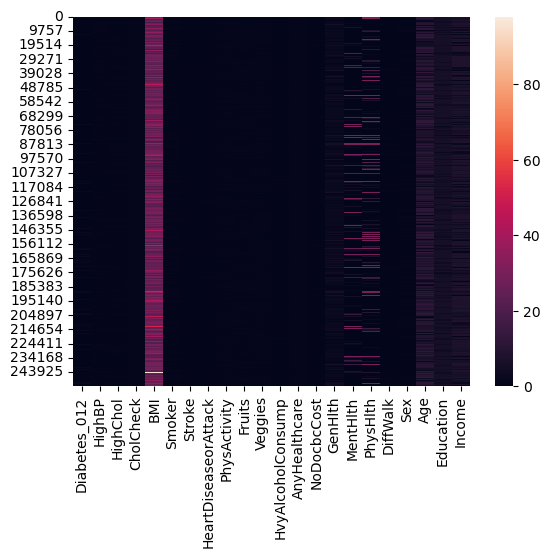

In [8]:
sns.heatmap(df)

In [9]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [10]:
df.describe().T

count       mean       std   min   25%   50%   75%  \
Diabetes_012          253680.0   0.296921  0.698160   0.0   0.0   0.0   0.0   
HighBP                253680.0   0.429001  0.494934   0.0   0.0   0.0   1.0   
HighChol              253680.0   0.424121  0.494210   0.0   0.0   0.0   1.0   
CholCheck             253680.0   0.962670  0.189571   0.0   1.0   1.0   1.0   
BMI                   253680.0  28.382364  6.608694  12.0  24.0  27.0  31.0   
Smoker                253680.0   0.443169  0.496761   0.0   0.0   0.0   1.0   
Stroke                253680.0   0.040571  0.197294   0.0   0.0   0.0   0.0   
HeartDiseaseorAttack  253680.0   0.094186  0.292087   0.0   0.0   0.0   0.0   
PhysActivity          253680.0   0.756544  0.429169   0.0   1.0   1.0   1.0   
Fruits                253680.0   0.634256  0.481639   0.0   0.0   1.0   1.0   
Veggies               253680.0   0.811420  0.391175   0.0   1.0   1.0   1.0   
HvyAlcoholConsump     253680.0   0.056197  0.230302   0.0   0.0   0.0   0.0   
AnyHealthcare         253680.0   0.951053  0.215759   0.0   1.0   1.0   1.0   
NoDocbcCost           253680.0   0.084177  0.277654   0.0   0.0   0.0   0.0   
GenHlth               253680.0   2.511392  1.068477   1.0   2.0   2.0   3.0   
MentHlth              253680.0   3.184772  7.412847   0.0   0.0   0.0   2.0   
PhysHlth              253680.0   4.242081  8.717951   0.0   0.0   0.0   3.0   
DiffWalk              253680.0   0.168224  0.374066   0.0   0.0   0.0   0.0   
Sex                   253680.0   0.440342  0.496429   0.0   0.0   0.0   1.0   
Age                   253680.0   8.032119  3.054220   1.0   6.0   8.0  10.0   
Education             253680.0   5.050434  0.985774   1.0   4.0   5.0   6.0   
Income                253680.0   6.053875  2.071148   1.0   5.0   7.0   8.0   

                       max  
Diabetes_012           2.0  
HighBP                 1.0  
HighChol               1.0  
CholCheck              1.0  
BMI                   98.0  
Smoker                 1.0  
Stroke                 1.0  
HeartDiseaseorAttack   1.0  
PhysActivity           1.0  
Fruits                 1.0  
Veggies                1.0  
HvyAlcoholConsump      1.0  
AnyHealthcare          1.0  
NoDocbcCost            1.0  
GenHlth                5.0  
MentHlth              30.0  
PhysHlth              30.0  
DiffWalk               1.0  
Sex                    1.0  
Age                   13.0  
Education              6.0  
Income                 8.0

In [11]:
df.shape

(253680, 22)

In [12]:
# Hemos localizado 23899 valores duplicados, vamos a eliminarlos.

In [13]:
df.duplicated().sum()

23899

In [14]:
df.loc[df.duplicated(),:]

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
1242             2.0     1.0       1.0        1.0  27.0     1.0     0.0   
1563             0.0     0.0       0.0        1.0  21.0     1.0     0.0   
2700             0.0     0.0       0.0        1.0  32.0     0.0     0.0   
3160             0.0     0.0       0.0        1.0  21.0     0.0     0.0   
3332             0.0     0.0       0.0        1.0  24.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
253492           2.0     1.0       1.0        1.0  33.0     0.0     0.0   
253550           0.0     0.0       0.0        1.0  25.0     0.0     0.0   
253563           0.0     0.0       1.0        1.0  24.0     1.0     0.0   
253597           0.0     0.0       0.0        1.0  24.0     0.0     0.0   
253638           0.0     0.0       0.0        1.0  24.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
1242                     0.0           0.0     0.0  ...            1.0   
1563                     0.0           1.0     1.0  ...            1.0   
2700                     0.0           1.0     1.0  ...            1.0   
3160                     0.0           1.0     1.0  ...            1.0   
3332                     0.0           1.0     1.0  ...            1.0   
...                      ...           ...     ...  ...            ...   
253492                   0.0           1.0     1.0  ...            1.0   
253550                   0.0           1.0     1.0  ...            1.0   
253563                   0.0           1.0     1.0  ...            1.0   
253597                   0.0           1.0     1.0  ...            1.0   
253638                   0.0           1.0     1.0  ...            1.0   

        NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
1242            0.0      5.0       0.0      30.0       1.0  0.0  10.0   
1563            0.0      1.0       0.0       0.0       0.0  0.0   4.0   
2700            0.0      2.0       0.0       0.0       0.0  0.0   5.0   
3160            0.0      1.0       0.0       0.0       0.0  0.0   4.0   
3332            0.0      1.0       0.0       0.0       0.0  1.0   9.0   
...             ...      ...       ...       ...       ...  ...   ...   
253492          0.0      3.0       0.0       0.0       0.0  1.0   9.0   
253550          0.0      1.0       0.0       0.0       0.0  0.0   7.0   
253563          0.0      2.0       0.0       0.0       0.0  1.0   8.0   
253597          0.0      2.0       0.0       0.0       0.0  0.0   5.0   
253638          0.0      2.0       0.0       0.0       0.0  1.0   1.0   

        Education  Income  
1242          4.0     5.0  
1563          6.0     8.0  
2700          6.0     8.0  
3160          6.0     8.0  
3332          6.0     8.0  
...           ...     ...  
253492        6.0     6.0  
253550        6.0     8.0  
253563        6.0     8.0  
253597        6.0     8.0  
253638        4.0     6.0  

[23899 rows x 22 columns]

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.shape

(229781, 22)

In [17]:
lista = []
for col in df.columns:
    lista.append(df[col].value_counts())
print(lista)

[0.0    190055
2.0     35097
1.0      4629
Name: Diabetes_012, dtype: int64, 0.0    125359
1.0    104422
Name: HighBP, dtype: int64, 0.0    128273
1.0    101508
Name: HighChol, dtype: int64, 1.0    220483
0.0      9298
Name: CholCheck, dtype: int64, 27.0    21551
26.0    17808
24.0    16537
28.0    14933
25.0    14809
        ...  
85.0        1
91.0        1
86.0        1
90.0        1
78.0        1
Name: BMI, Length: 84, dtype: int64, 0.0    122781
1.0    107000
Name: Smoker, dtype: int64, 0.0    219497
1.0     10284
Name: Stroke, dtype: int64, 0.0    206064
1.0     23717
Name: HeartDiseaseorAttack, dtype: int64, 1.0    168511
0.0     61270
Name: PhysActivity, dtype: int64, 1.0    140848
0.0     88933
Name: Fruits, dtype: int64, 1.0    182633
0.0     47148
Name: Veggies, dtype: int64, 0.0    215831
1.0     13950
Name: HvyAlcoholConsump, dtype: int64, 1.0    217390
0.0     12391
Name: AnyHealthcare, dtype: int64, 0.0    208455
1.0     21326
Name: NoDocbcCost, dtype: int64, 2.0    7753

In [18]:
# Número de valores diferentes en cada feature:

unique_values = {}
for col in df.columns:
    unique_values[col] = df[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['Recuento de valores diferentes']).transpose()

Recuento de valores diferentes
Diabetes_012                                       3
HighBP                                             2
HighChol                                           2
CholCheck                                          2
BMI                                               84
Smoker                                             2
Stroke                                             2
HeartDiseaseorAttack                               2
PhysActivity                                       2
Fruits                                             2
Veggies                                            2
HvyAlcoholConsump                                  2
AnyHealthcare                                      2
NoDocbcCost                                        2
GenHlth                                            5
MentHlth                                          31
PhysHlth                                          31
DiffWalk                                           2
Sex                                                2
Age                                               13
Education                                          6
Income                                             8

In [19]:
df_cols = list(df.columns)[1:]
df_cols

['HighBP',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education',
 'Income']

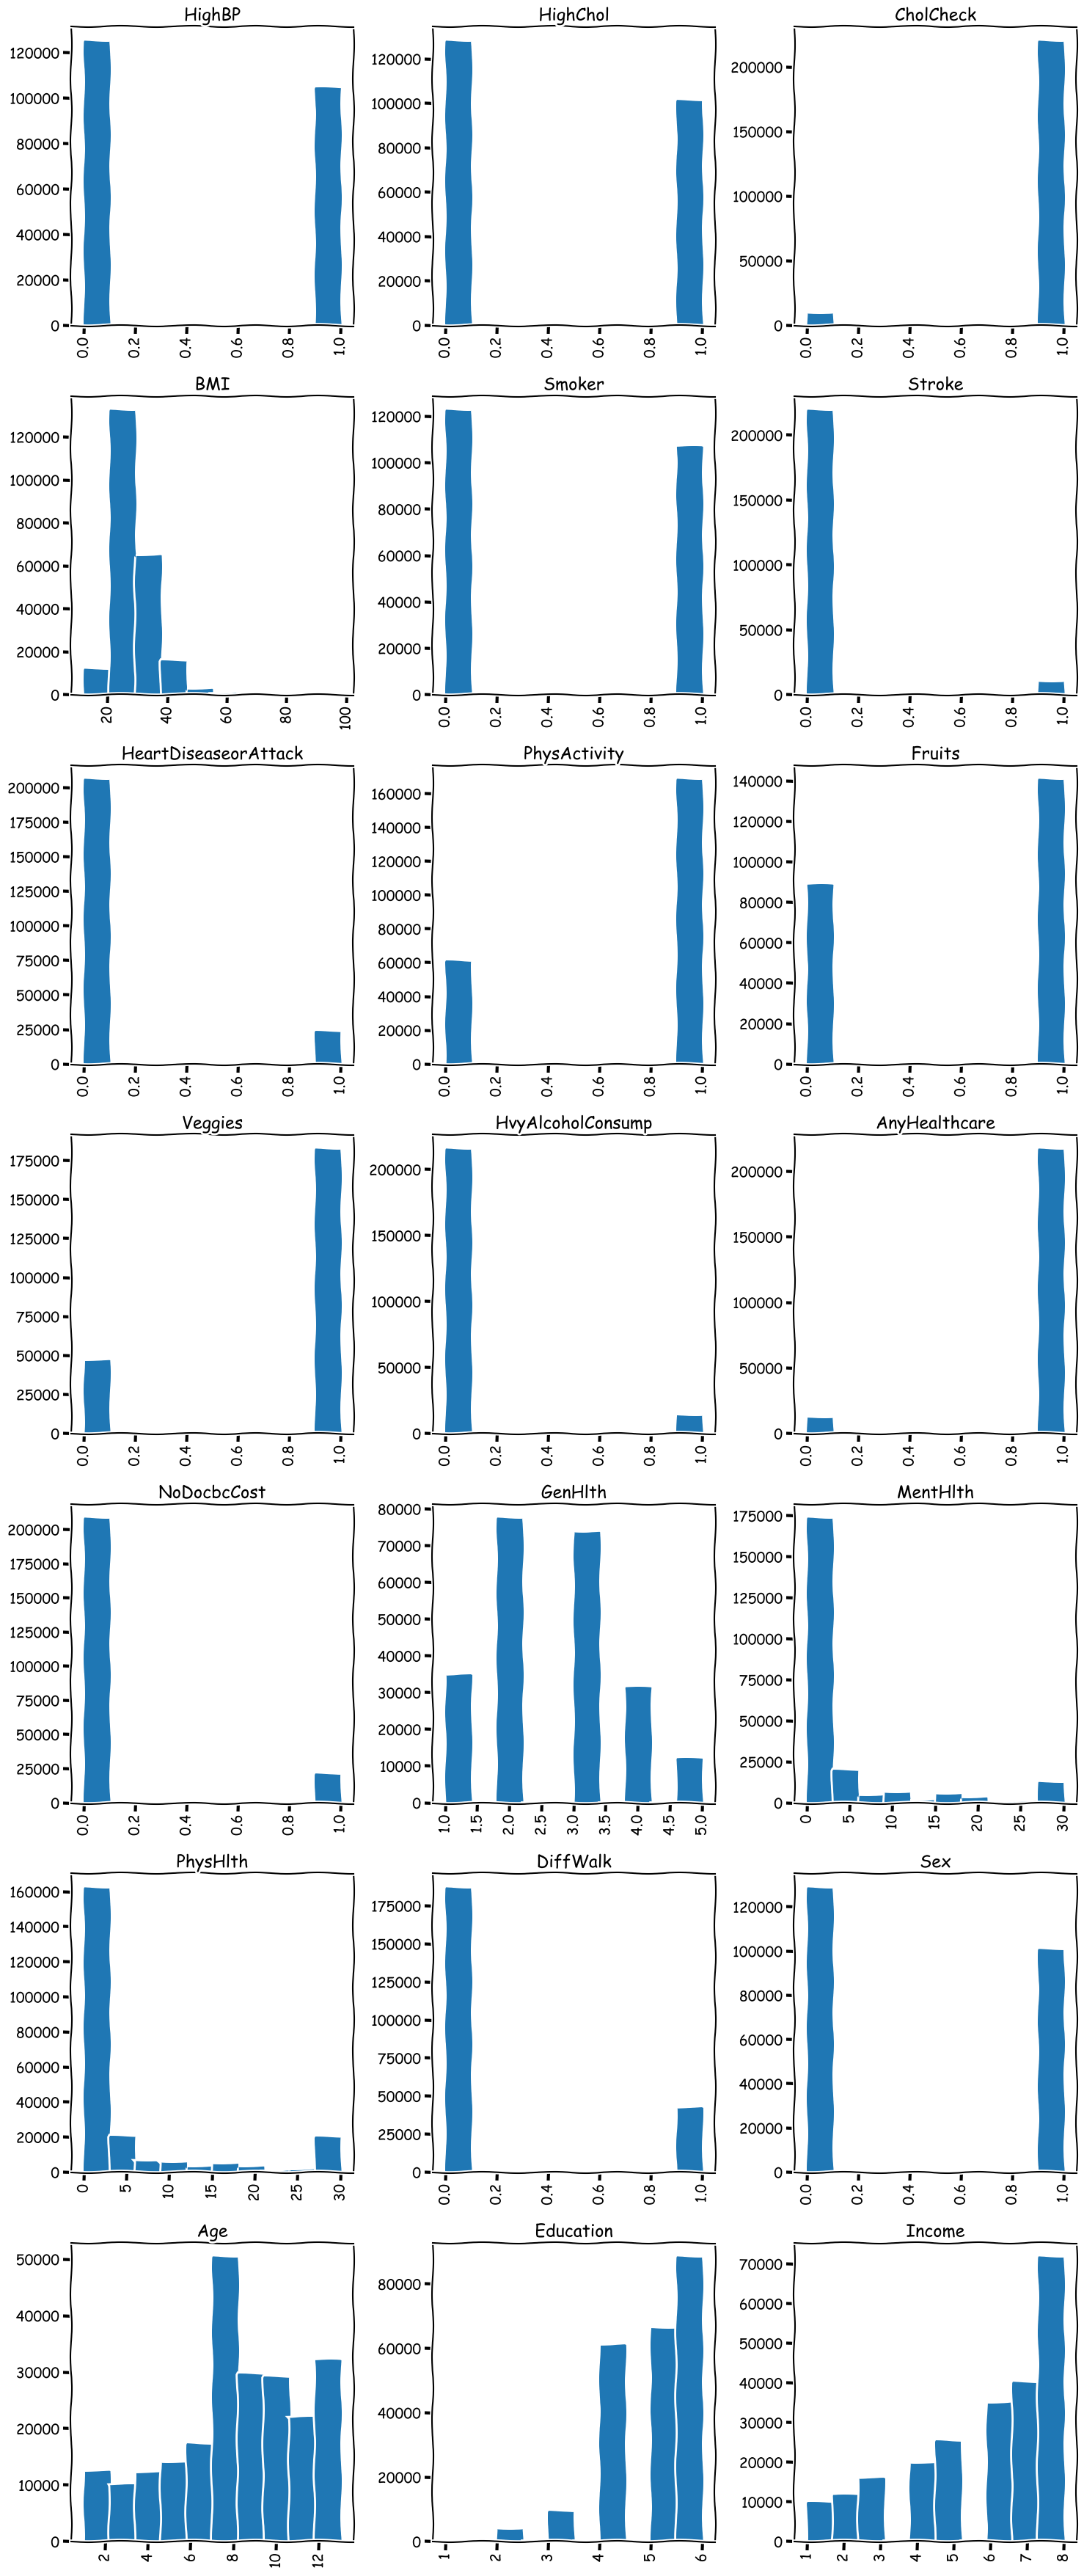

In [20]:

with plt.xkcd():
    plt.figure(figsize=(15,40))
    for i in range(len(df_cols)):
        plt.subplot(8,3,i+1)
        plt.title(df_cols[i])
        plt.xticks(rotation=90)
        plt.hist(df[df_cols[i]])
        plt.tight_layout()
plt.savefig("columnasvis.png")
plt.show()

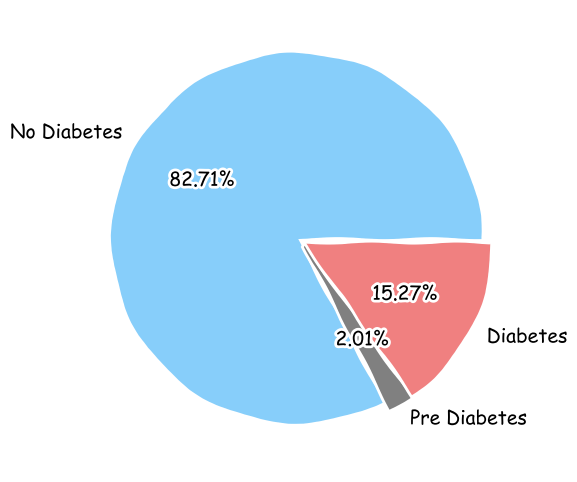

In [21]:
# pie plot de la columna que queremos predecir
with plt.xkcd():
    plt.figure(figsize=(8,6))
    labels = ['No Diabetes', 'Pre Diabetes', 'Diabetes']
    sizes = [df['Diabetes_012'].value_counts()[0], df['Diabetes_012'].value_counts()[1], df['Diabetes_012'].value_counts()[2]]
    colors = ['lightskyblue', 'grey', 'lightcoral']
    explode = (0.03, 0.03, 0.03) 
    plt.pie(sizes, explode=explode, labels=labels, autopct='%0.2f%%', colors=colors, data = df)
    plt.savefig("tarta.png")
    plt.show()

In [22]:
# profile = ProfileReport(df)
# profile

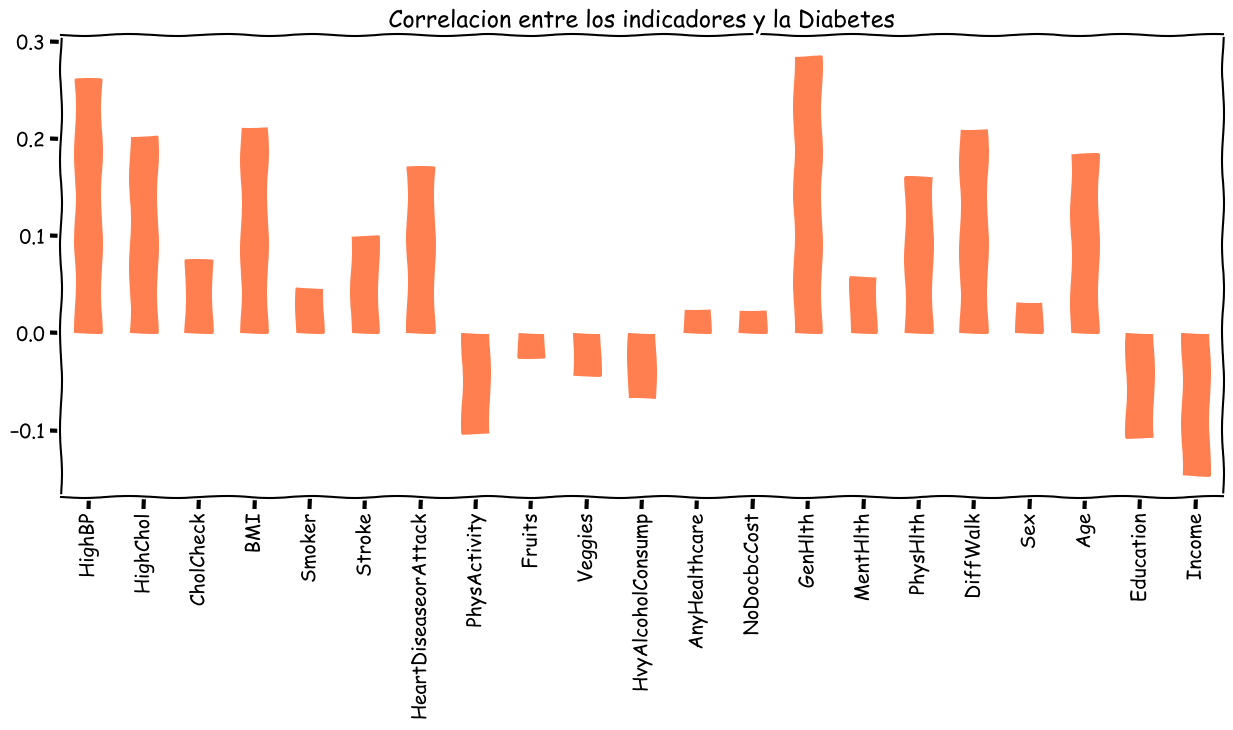

In [23]:
with plt.xkcd():
    df.drop('Diabetes_012', axis=1).corrwith(df.Diabetes_012).plot(kind='bar', 
                                                                   figsize=(15, 6), 
                                                                   title="Correlacion entre los indicadores y la Diabetes", 
                                                                   color="coral")
plt.savefig("correlacion.png")
# Se puede observar que la presión arterial alta, el colesterol alto, el índice de masa corportal, las enfermedades cardíacas, 
# el estado general de salud y la edad son los más correlacionados con la Diabetes, mientras que el nivel educativo, los ingresos 
# más altos, la actividad física y el consumo de frutas, vegetales y alcohol se correlacionan negativamente, osea que de algún modo
# ayudan a prevenir la enfermedad.

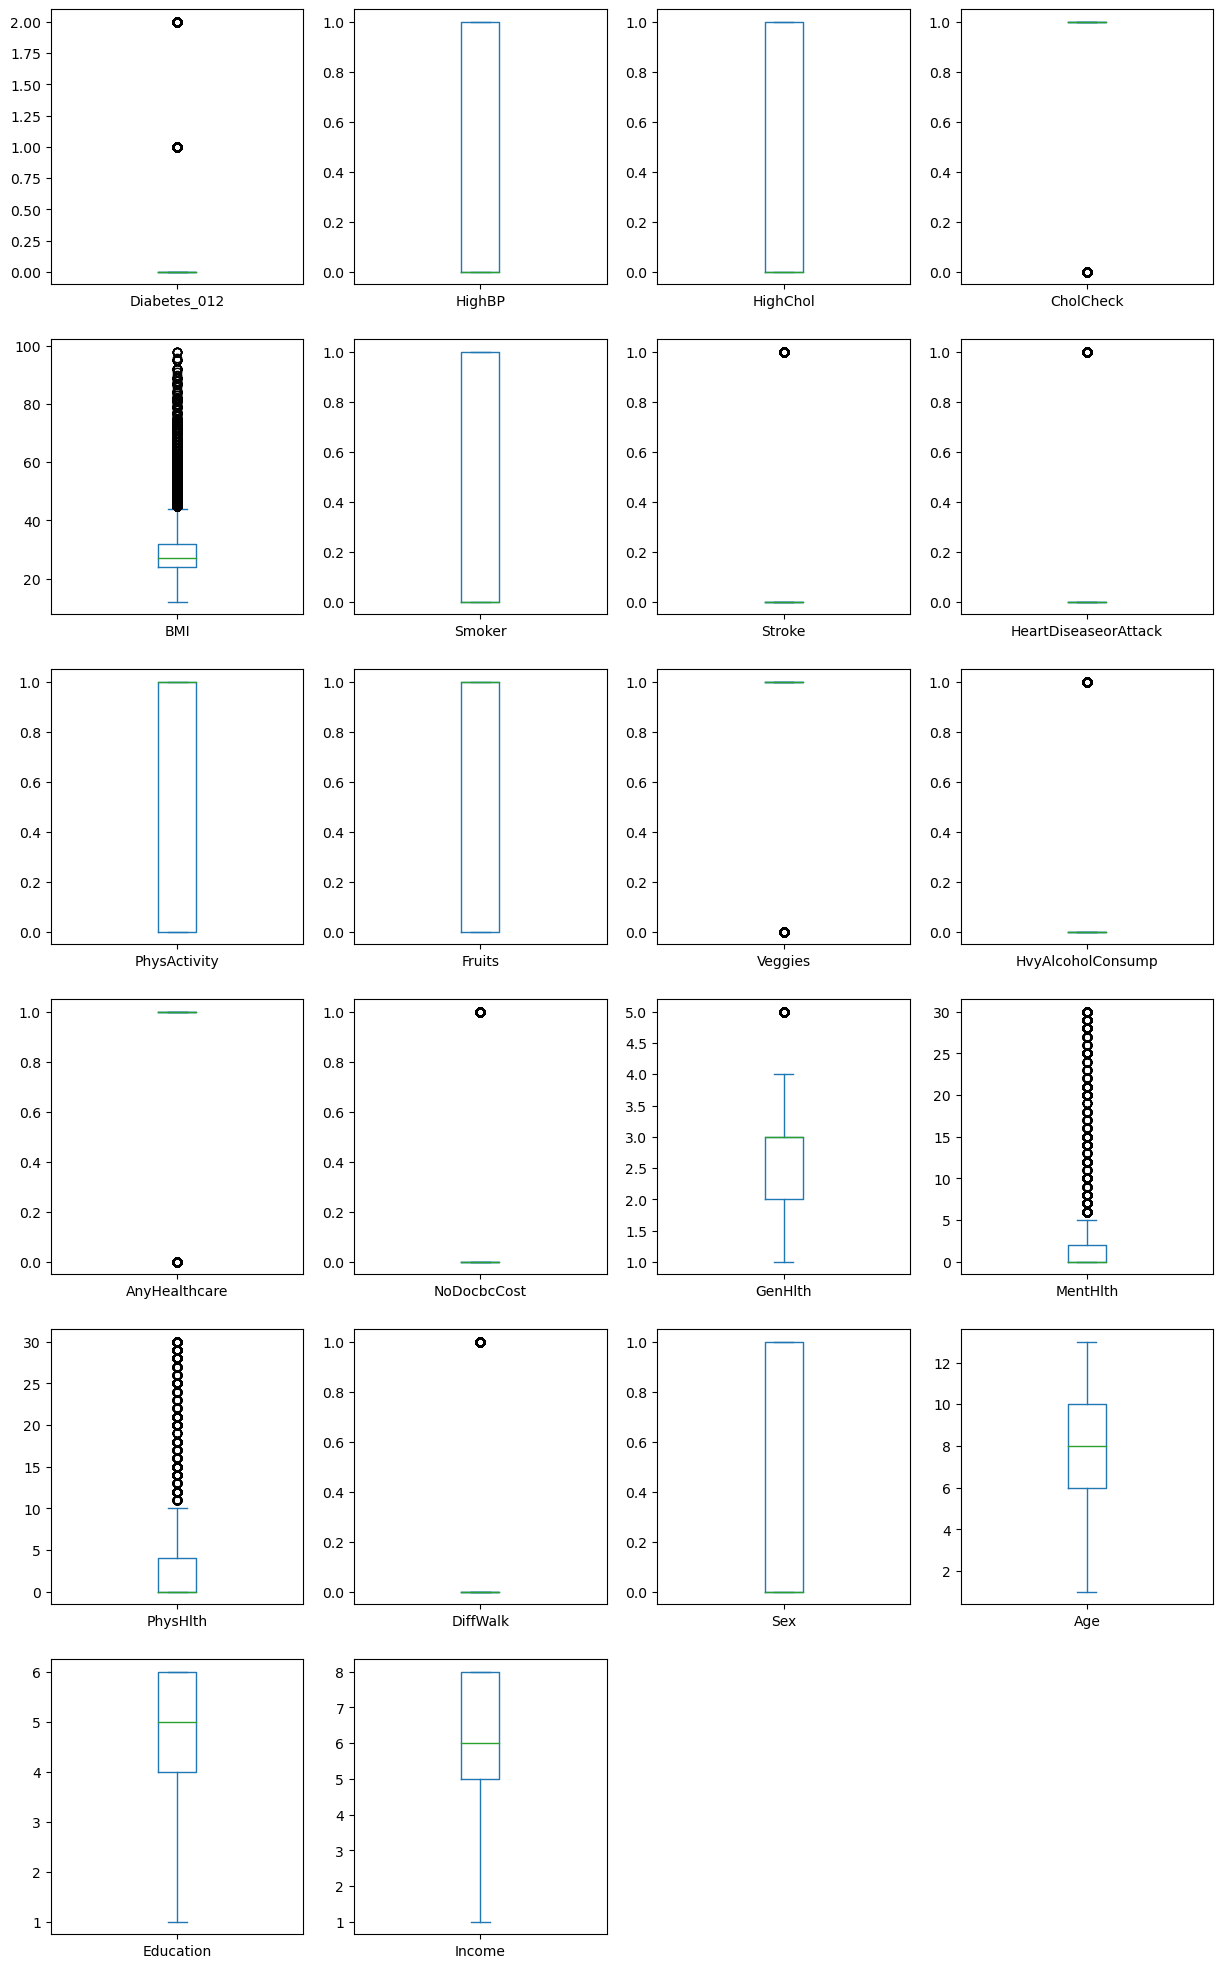

In [24]:
# nos encontramos muchos outliers, especialmente en BMI, con valores excesivos

df.plot(kind="box", subplots=True, layout=(6,4), figsize=(15,25));
plt.savefig("outliers.png")

In [25]:
df["BMI"].unique()

array([40., 25., 28., 27., 24., 30., 34., 26., 33., 21., 23., 22., 38.,
       32., 37., 31., 29., 20., 35., 45., 39., 19., 47., 18., 36., 43.,
       55., 49., 42., 17., 16., 41., 44., 50., 59., 48., 52., 46., 54.,
       57., 53., 14., 15., 51., 58., 63., 61., 56., 74., 62., 64., 66.,
       73., 85., 60., 67., 65., 70., 82., 79., 92., 68., 72., 88., 96.,
       13., 81., 71., 75., 12., 77., 69., 76., 87., 89., 84., 95., 98.,
       91., 86., 83., 80., 90., 78.])

In [26]:
#ver cuantos valores hay por encima de 70
df[df["BMI"] >= 50]

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
201              2.0     1.0       1.0        1.0  55.0     0.0     0.0   
658              1.0     0.0       0.0        1.0  50.0     1.0     0.0   
670              2.0     1.0       0.0        1.0  59.0     0.0     0.0   
736              0.0     1.0       0.0        1.0  50.0     0.0     0.0   
758              2.0     1.0       1.0        1.0  52.0     1.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
252714           0.0     1.0       1.0        1.0  55.0     0.0     0.0   
252819           0.0     0.0       0.0        1.0  55.0     1.0     0.0   
252844           2.0     1.0       0.0        1.0  51.0     0.0     0.0   
253316           0.0     0.0       0.0        1.0  51.0     1.0     0.0   
253330           2.0     1.0       1.0        1.0  60.0     1.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
201                      0.0           0.0     1.0  ...            1.0   
658                      0.0           1.0     1.0  ...            1.0   
670                      0.0           1.0     1.0  ...            0.0   
736                      0.0           0.0     0.0  ...            1.0   
758                      0.0           1.0     0.0  ...            1.0   
...                      ...           ...     ...  ...            ...   
252714                   0.0           0.0     1.0  ...            1.0   
252819                   0.0           1.0     0.0  ...            1.0   
252844                   0.0           0.0     0.0  ...            1.0   
253316                   0.0           1.0     1.0  ...            1.0   
253330                   1.0           0.0     0.0  ...            1.0   

        NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
201             0.0      4.0       0.0      15.0       0.0  0.0  11.0   
658             0.0      2.0       3.0       8.0       0.0  0.0   3.0   
670             1.0      3.0       0.0       0.0       0.0  0.0   5.0   
736             0.0      2.0       3.0       3.0       1.0  0.0  10.0   
758             0.0      3.0       0.0       2.0       1.0  1.0  10.0   
...             ...      ...       ...       ...       ...  ...   ...   
252714          0.0      4.0       0.0       0.0       0.0  1.0   4.0   
252819          1.0      2.0       5.0       0.0       0.0  0.0   3.0   
252844          1.0      4.0       0.0       7.0       1.0  0.0   7.0   
253316          0.0      3.0       0.0       0.0       0.0  0.0   8.0   
253330          0.0      4.0       0.0       4.0       1.0  1.0   6.0   

        Education  Income  
201           5.0     2.0  
658           5.0     6.0  
670           6.0     1.0  
736           4.0     7.0  
758           5.0     6.0  
...           ...     ...  
252714        5.0     1.0  
252819        5.0     1.0  
252844        4.0     5.0  
253316        2.0     1.0  
253330        5.0     2.0  

[2547 rows x 22 columns]

In [27]:
df=df[df['BMI']<50]

In [28]:
df['Diabetes_012'].value_counts()

0.0    188438
2.0     34246
1.0      4550
Name: Diabetes_012, dtype: int64

In [29]:
%%time
#Detección de outliers con el modelo IsolationForest, se añaden a una columna
iso = IsolationForest(contamination=0.09)
iso.fit(df)
#df['anomailes_scores']=iso.decision_function(df)
df['anomaly']= iso.predict(df)
df

Wall time: 25.5 s


Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
253675           0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676           2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677           0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678           0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679           2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  NoDocbcCost  GenHlth  \
0                        0.0           0.0     0.0  ...          0.0      5.0   
1                        0.0           1.0     0.0  ...          1.0      3.0   
2                        0.0           0.0     1.0  ...          1.0      5.0   
3                        0.0           1.0     1.0  ...          0.0      2.0   
4                        0.0           1.0     1.0  ...          0.0      2.0   
...                      ...           ...     ...  ...          ...      ...   
253675                   0.0           0.0     1.0  ...          0.0      3.0   
253676                   0.0           0.0     0.0  ...          0.0      4.0   
253677                   0.0           1.0     1.0  ...          0.0      1.0   
253678                   0.0           0.0     1.0  ...          0.0      3.0   
253679                   1.0           1.0     1.0  ...          0.0      2.0   

        MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  Income  anomaly  
0           18.0      15.0       1.0  0.0   9.0        4.0     3.0        1  
1            0.0       0.0       0.0  0.0   7.0        6.0     1.0       -1  
2           30.0      30.0       1.0  0.0   9.0        4.0     8.0       -1  
3            0.0       0.0       0.0  0.0  11.0        3.0     6.0        1  
4            3.0       0.0       0.0  0.0  11.0        5.0     4.0        1  
...          ...       ...       ...  ...   ...        ...     ...      ...  
253675       0.0       5.0       0.0  1.0   5.0        6.0     7.0        1  
253676       0.0       0.0       1.0  0.0  11.0        2.0     4.0       -1  
253677       0.0       0.0       0.0  0.0   2.0        5.0     2.0        1  
253678       0.0       0.0       0.0  1.0   7.0        5.0     1.0        1  
253679       0.0       0.0       0.0  0.0   9.0        6.0     2.0        1  

[227234 rows x 23 columns]

In [30]:
# queremos eliminar los valores con anomaly -1
df[df['anomaly']==-1].shape

(20451, 23)

In [31]:
# Vemos el porcentaje de valores que se van a eliminar("-1") de cada clase
df[["anomaly", "Diabetes_012"]].value_counts(normalize = True)

anomaly  Diabetes_012
 1       0.0             0.778312
         2.0             0.114890
-1       0.0             0.050956
         2.0             0.035818
 1       1.0             0.016798
-1       1.0             0.003226
dtype: float64

In [32]:
df.drop(df[df['anomaly']==-1].index,inplace = True)

In [33]:
df.shape

(206783, 23)

In [34]:
df.drop(columns=['anomaly'], inplace=True)

In [35]:
df.shape

(206783, 22)

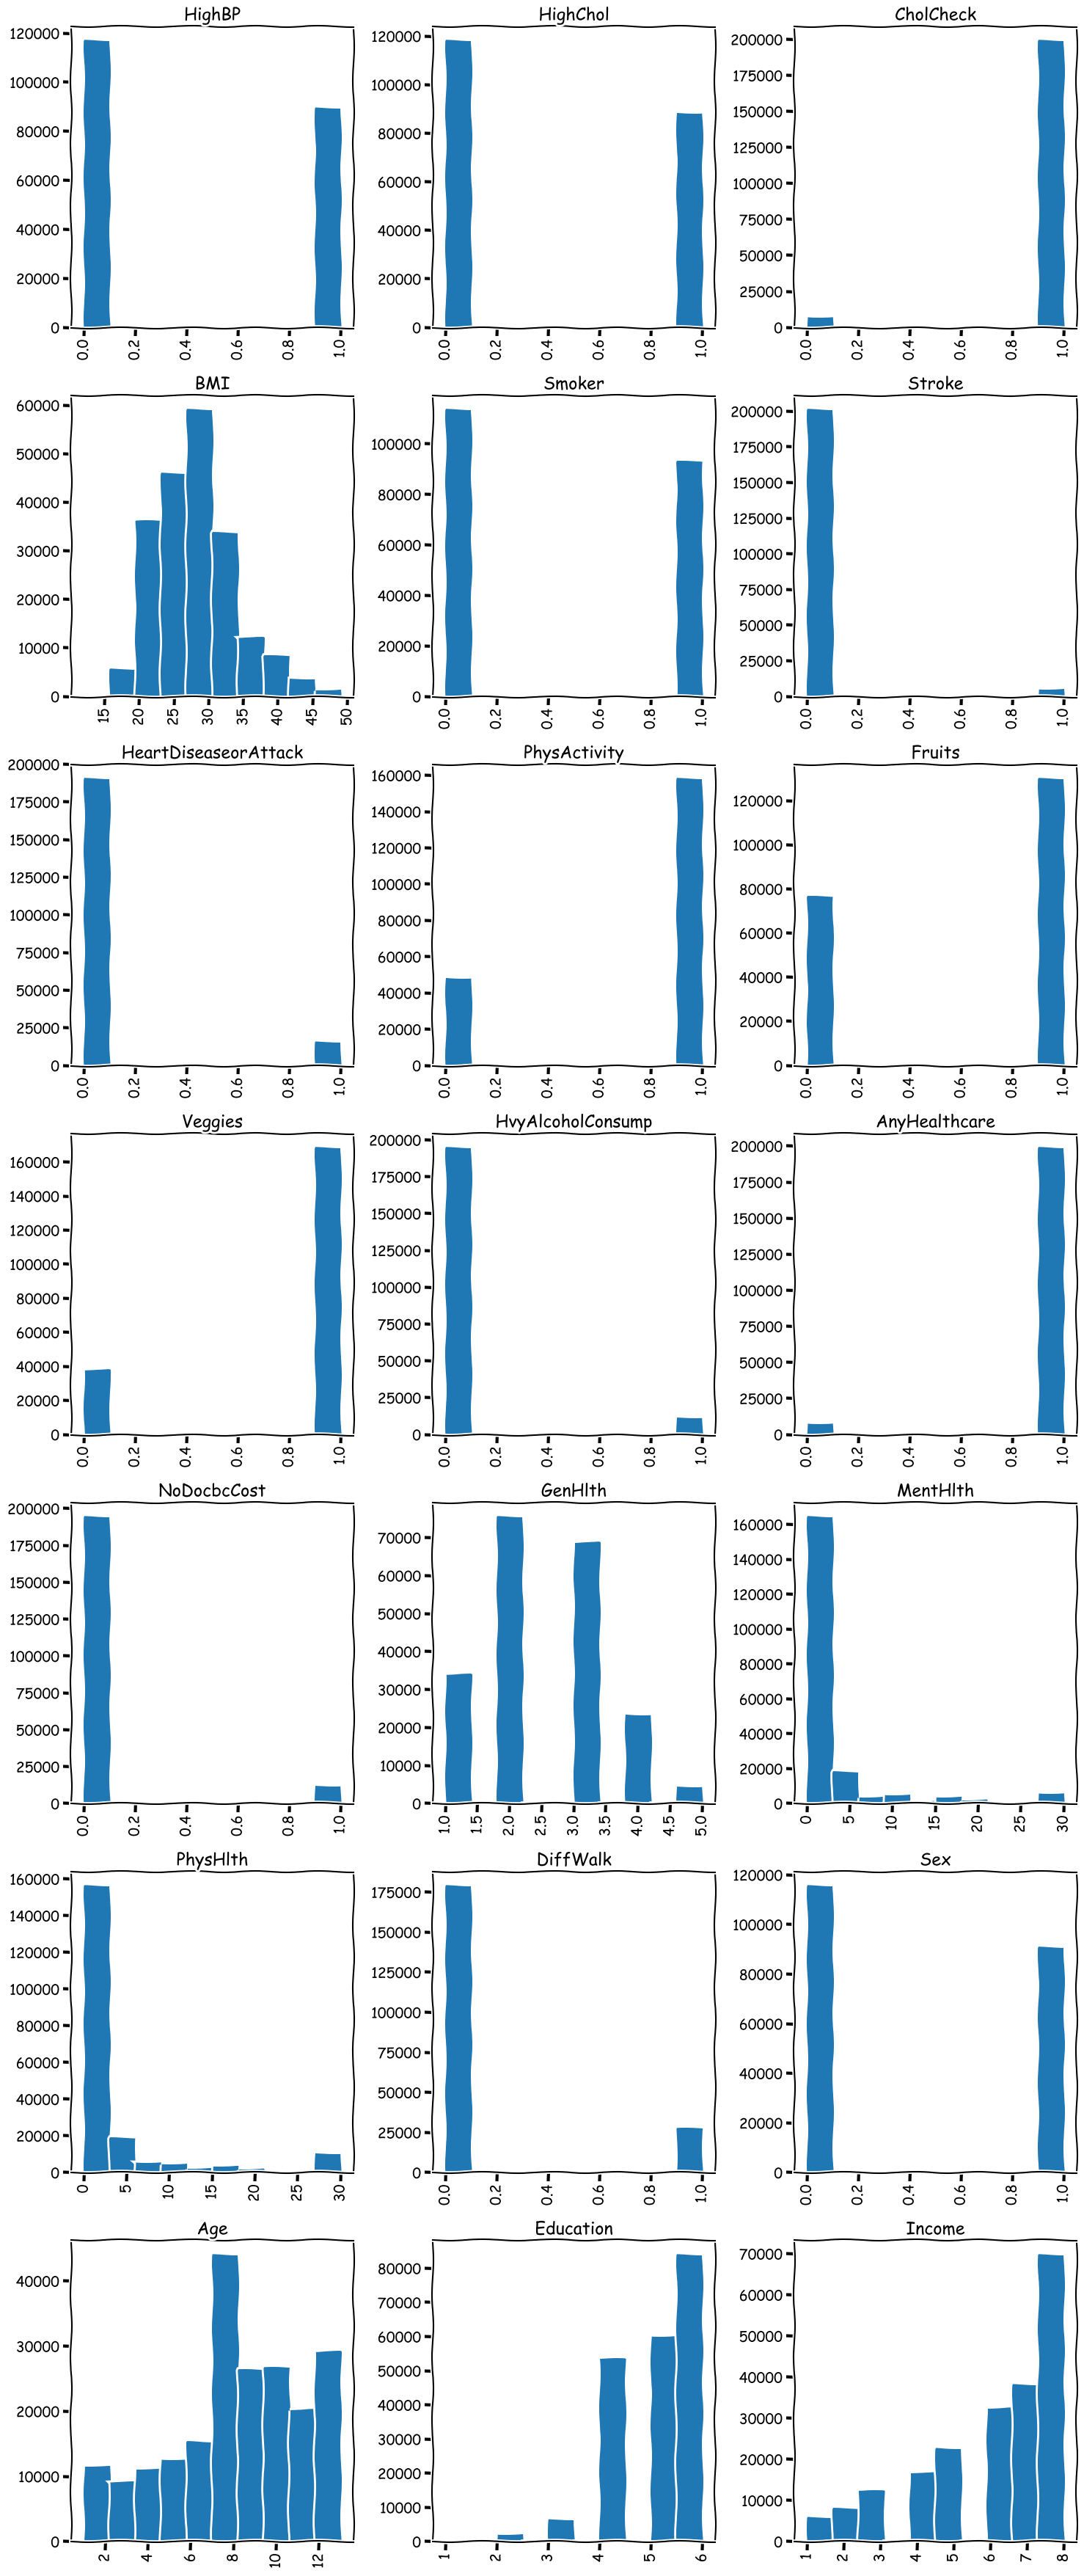

In [36]:
with plt.xkcd():
    plt.figure(figsize=(15,40))
    for i in range(len(df_cols)):
        plt.subplot(8,3,i+1)
        plt.title(df_cols[i])
        plt.xticks(rotation=90)
        plt.hist(df[df_cols[i]])
        plt.tight_layout()
plt.savefig("columnasvisbmi.png")
plt.show()

In [37]:
df["Diabetes_012"].value_counts()

0.0    176859
2.0     26107
1.0      3817
Name: Diabetes_012, dtype: int64

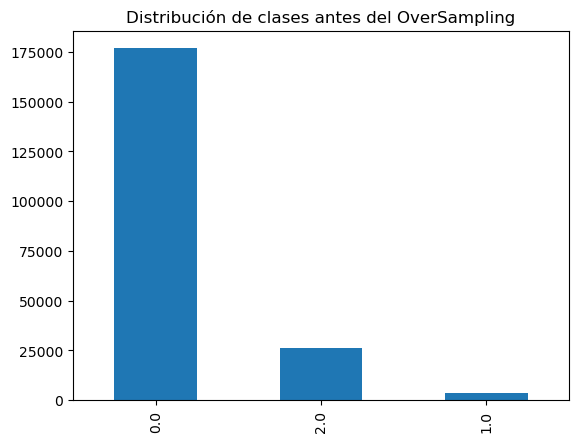

In [38]:
df['Diabetes_012'].value_counts().plot(kind='bar', title='Distribución de clases antes del OverSampling')
plt.savefig("preoversampling.png")

In [39]:
# eliminamos la población con diagnóstico de prediabetes
df.drop(df[df["Diabetes_012"] == 1].index, axis = 0, inplace= True)


In [40]:
df[df["Diabetes_012"] == 1]

Empty DataFrame
Columns: [Diabetes_012, HighBP, HighChol, CholCheck, BMI, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, GenHlth, MentHlth, PhysHlth, DiffWalk, Sex, Age, Education, Income]
Index: []

[0 rows x 22 columns]

In [41]:
# reetiquetamos la población con diabetes como "1"
df["Diabetes_012"].replace({2: 1}, inplace= True)

In [42]:
df.shape

(202966, 22)

In [43]:
df['Diabetes_012'].value_counts()

0.0    176859
1.0     26107
Name: Diabetes_012, dtype: int64

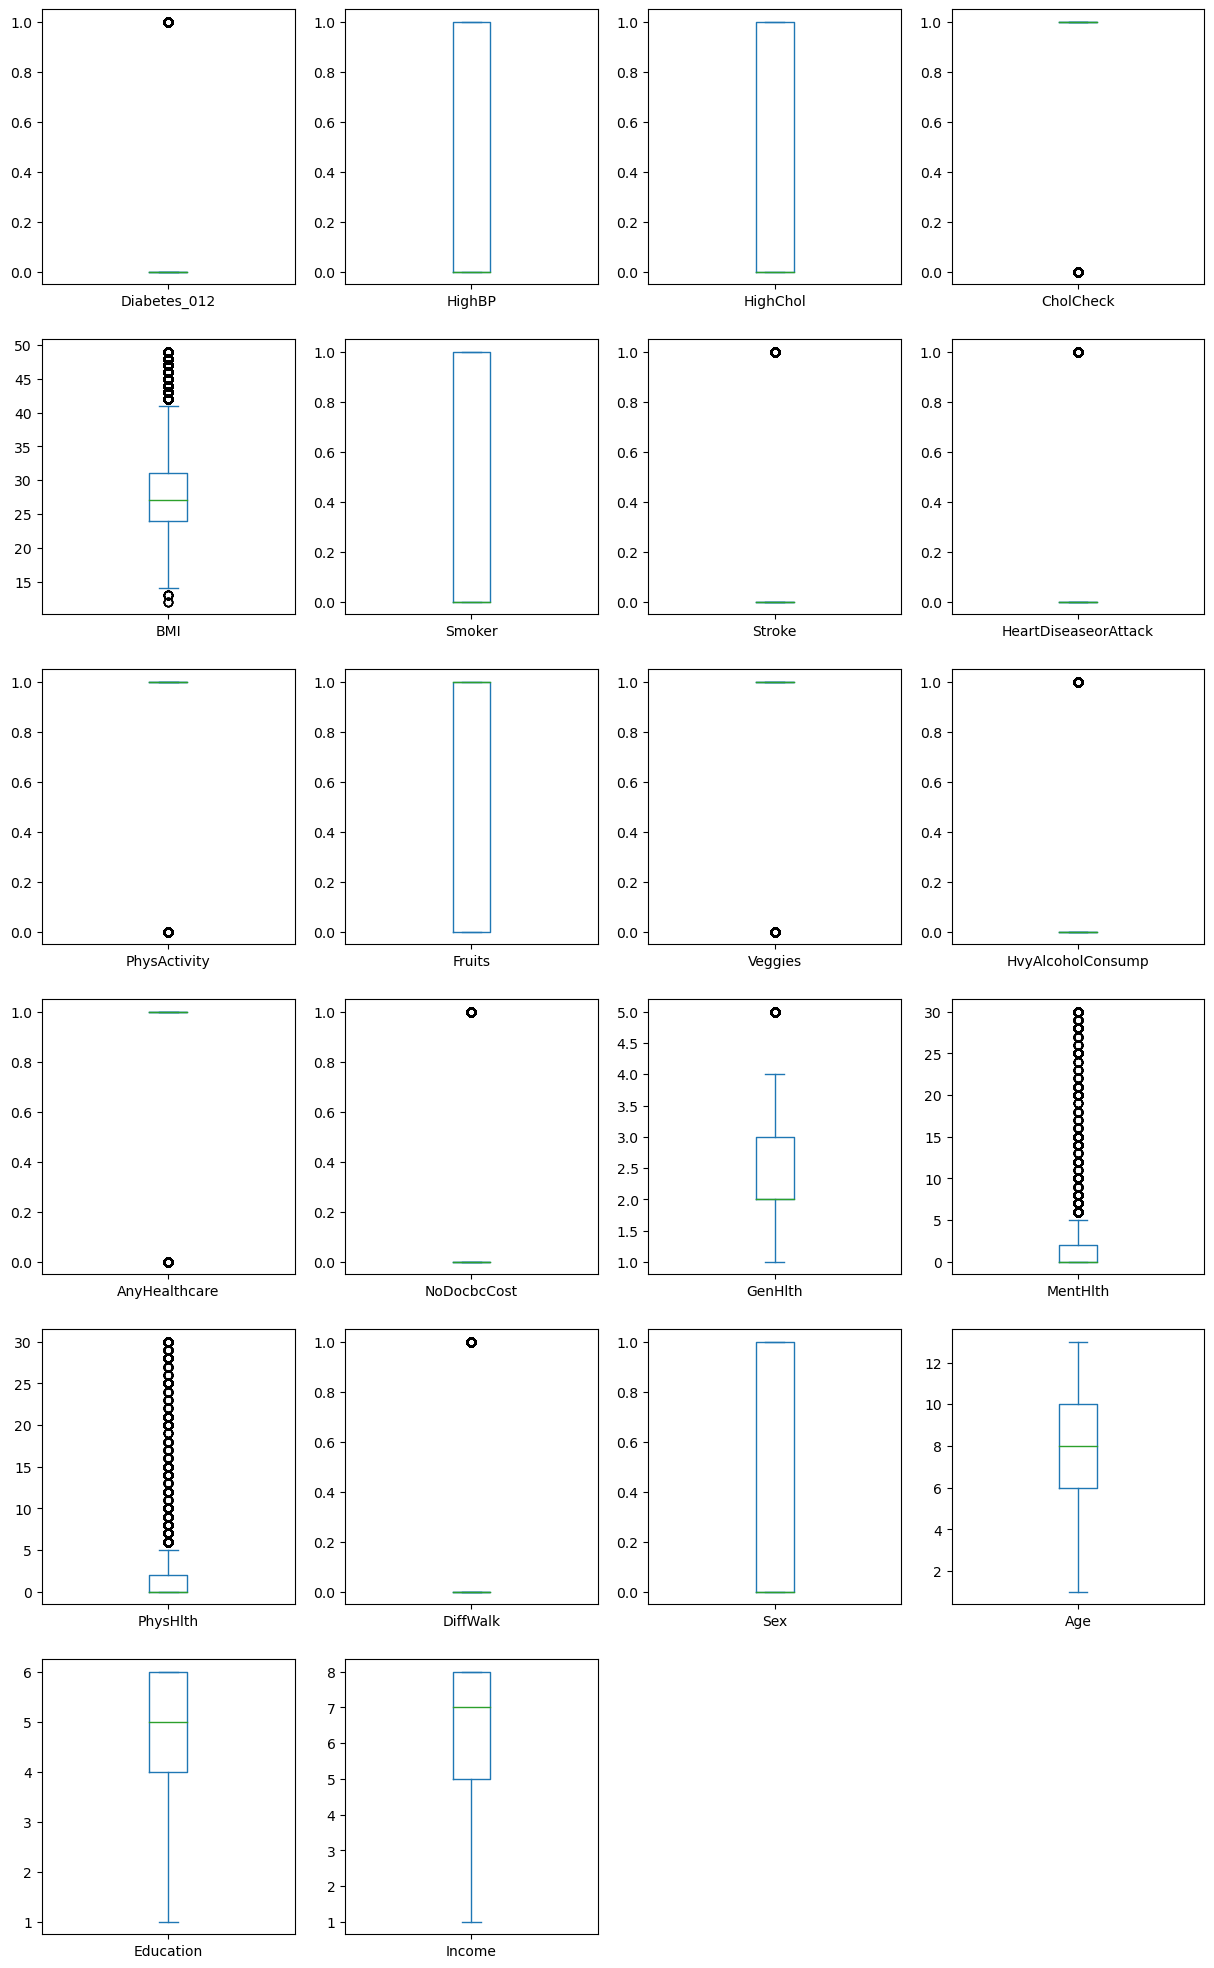

In [44]:
# nos encontramos muchos outliers, especialmente en BMI, con valores excesivos
df.plot(kind="box", subplots=True, layout=(6,4), figsize=(15,25));
plt.savefig("outliersbmi.png")

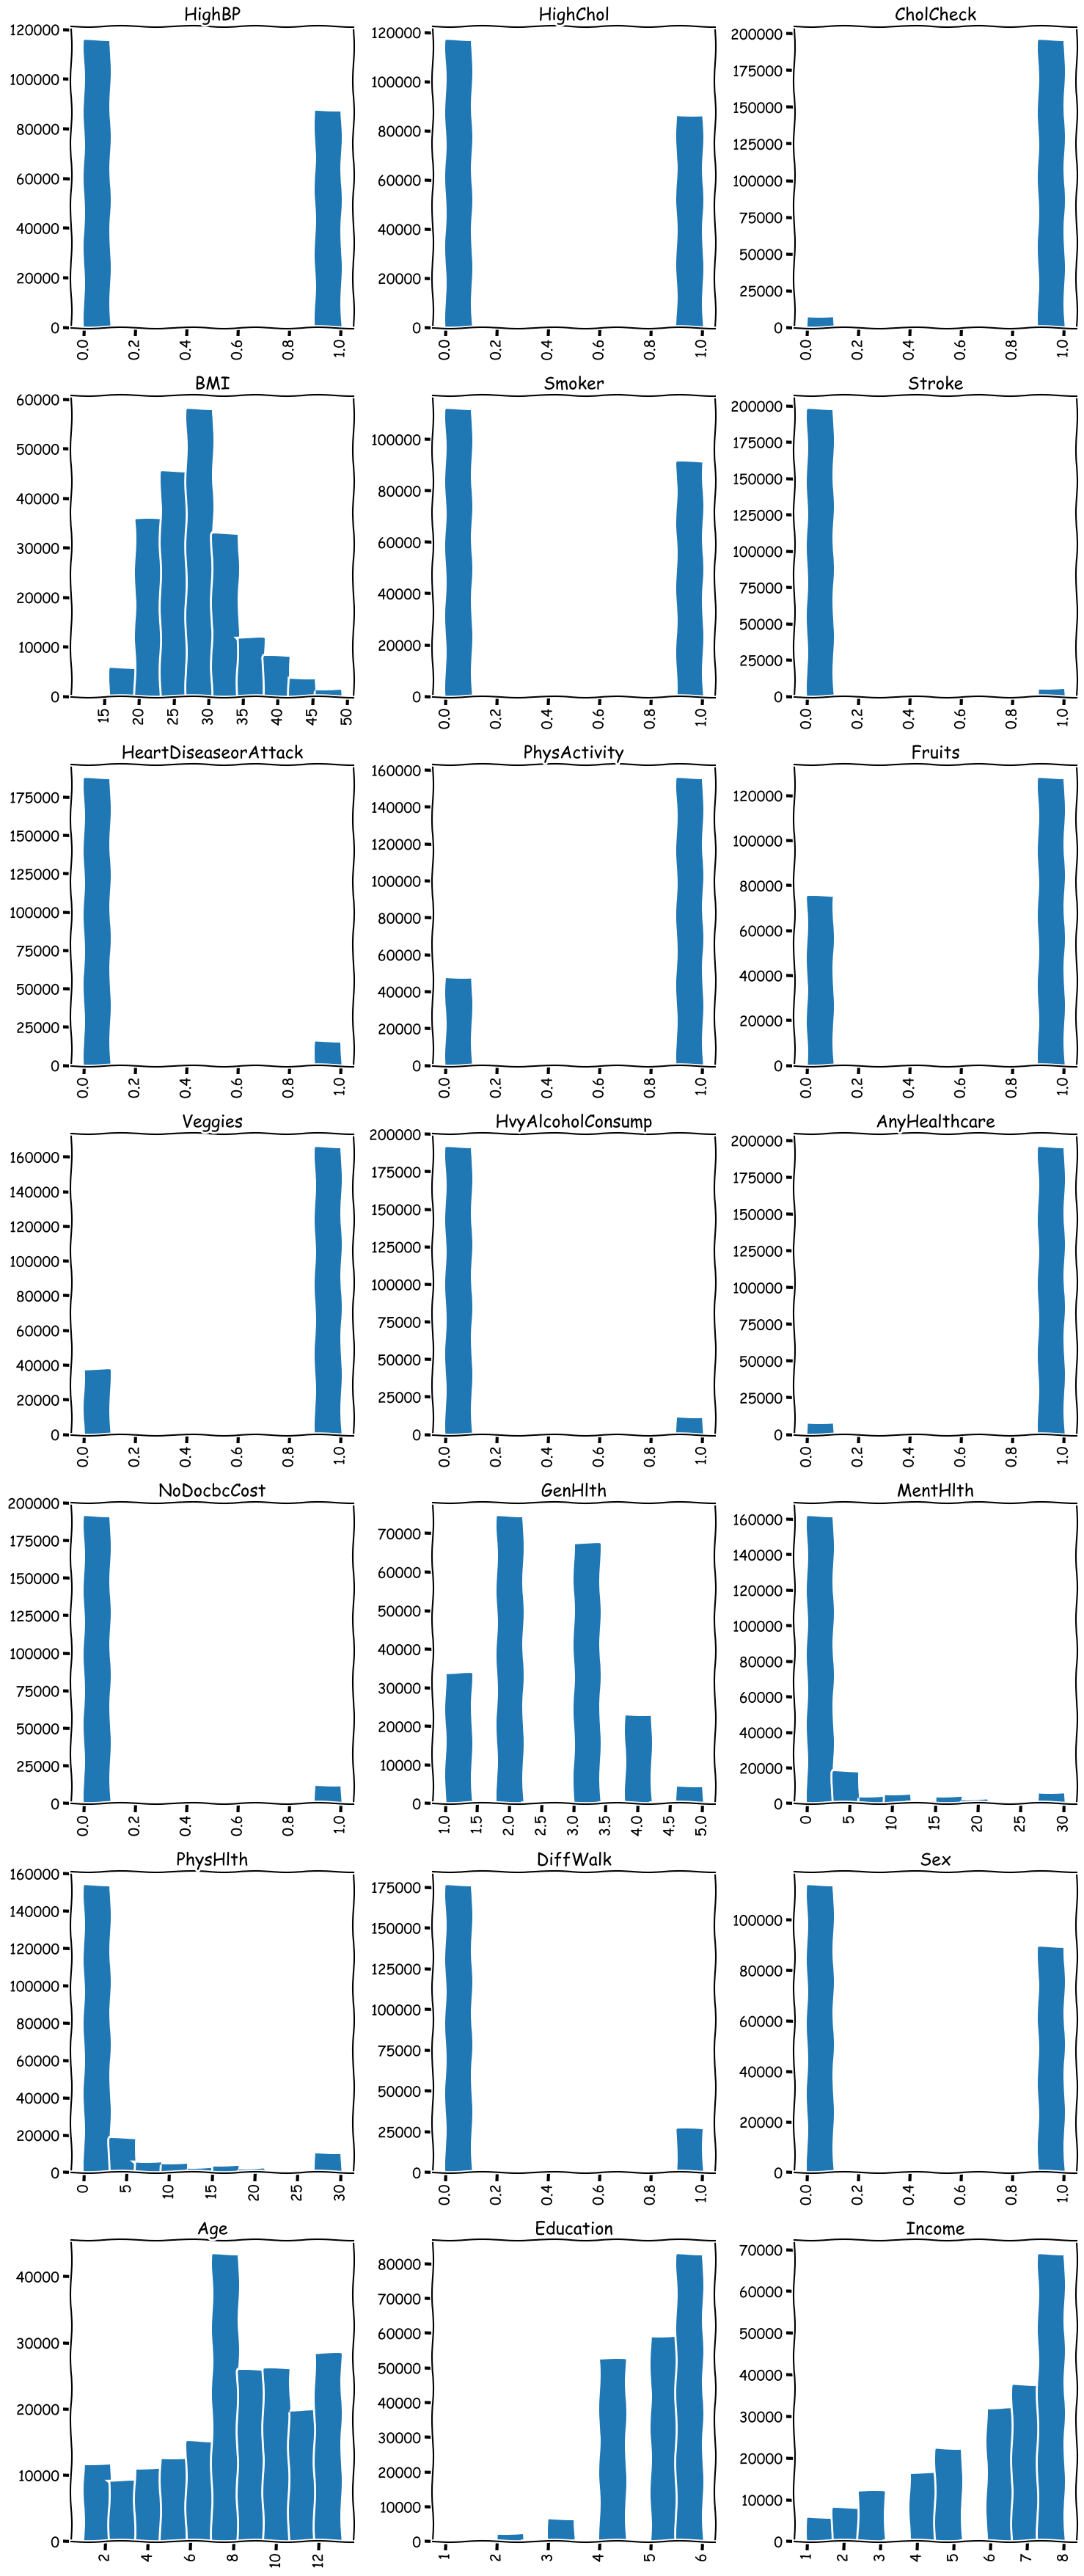

In [45]:
with plt.xkcd():
    plt.figure(figsize=(15,40))
    for i in range(len(df_cols)):
        plt.subplot(8,3,i+1)
        plt.title(df_cols[i])
        plt.xticks(rotation=90)
        plt.hist(df[df_cols[i]])
        plt.tight_layout()
# plt.savefig("columnasvis.png")
plt.show()

In [46]:
# Las columnas de salud mental y física tienen demasiados datos extraños, muchos 0 y están desbalanceadas. Las eliminamos
df.drop(["PhysHlth", "MentHlth"], axis=1, inplace=True)
df

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                0.0     1.0       1.0        1.0  40.0     1.0     0.0   
3                0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                0.0     1.0       1.0        1.0  24.0     0.0     0.0   
5                0.0     1.0       1.0        1.0  25.0     1.0     0.0   
6                0.0     1.0       0.0        1.0  30.0     1.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
253674           0.0     0.0       0.0        1.0  27.0     0.0     0.0   
253675           0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253677           0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678           0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679           1.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  \
0                        0.0           0.0     0.0      1.0   
3                        0.0           1.0     1.0      1.0   
4                        0.0           1.0     1.0      1.0   
5                        0.0           1.0     1.0      1.0   
6                        0.0           0.0     0.0      0.0   
...                      ...           ...     ...      ...   
253674                   0.0           0.0     0.0      1.0   
253675                   0.0           0.0     1.0      1.0   
253677                   0.0           1.0     1.0      0.0   
253678                   0.0           0.0     1.0      1.0   
253679                   1.0           1.0     1.0      0.0   

        HvyAlcoholConsump  AnyHealthcare  NoDocbcCost  GenHlth  DiffWalk  Sex  \
0                     0.0            1.0          0.0      5.0       1.0  0.0   
3                     0.0            1.0          0.0      2.0       0.0  0.0   
4                     0.0            1.0          0.0      2.0       0.0  0.0   
5                     0.0            1.0          0.0      2.0       0.0  1.0   
6                     0.0            1.0          0.0      3.0       0.0  0.0   
...                   ...            ...          ...      ...       ...  ...   
253674                0.0            1.0          0.0      1.0       0.0  0.0   
253675                0.0            1.0          0.0      3.0       0.0  1.0   
253677                0.0            1.0          0.0      1.0       0.0  0.0   
253678                0.0            1.0          0.0      3.0       0.0  1.0   
253679                0.0            1.0          0.0      2.0       0.0  0.0   

         Age  Education  Income  
0        9.0        4.0     3.0  
3       11.0        3.0     6.0  
4       11.0        5.0     4.0  
5       10.0        6.0     8.0  
6        9.0        6.0     7.0  
...      ...        ...     ...  
253674   3.0        6.0     5.0  
253675   5.0        6.0     7.0  
253677   2.0        5.0     2.0  
253678   7.0        5.0     1.0  
253679   9.0        6.0     2.0  

[202966 rows x 20 columns]

In [47]:
df.shape

(202966, 20)

In [48]:
df['Diabetes_012'].value_counts()

0.0    176859
1.0     26107
Name: Diabetes_012, dtype: int64

## Separamos los datos

In [49]:
# separamos las dos clases, sin y con diabetes:

class_0 = df[df["Diabetes_012"] == 0]

class_1 = df[df['Diabetes_012'] == 1]

print( len(class_0), len(class_1))

176859 26107


## Balance de poblaciones: Oversampling de la clase 1

In [50]:

class_1_over = resample(class_1, 
                       replace = True,    
                       n_samples = len(class_1)*2,  
                       random_state = 42) 


## Balance de poblaciones: Undersampling de la clase 0

In [51]:
# 3//4
class_0_under = resample(class_0, 
                         replace = True,    
                         n_samples = len(class_0)*5//7,
                         random_state = 42) 

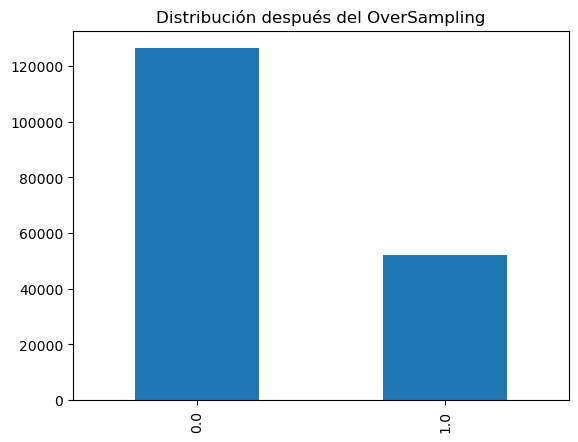

In [52]:

# Creamos nuevo dataframe con la clase 1 sobremuestreada y la clase 0 inframuestreada
df_new = pd.concat([class_1_over, class_0_under], axis=0)

# Visualizamos nuevo dataframe con las clases balanceadas
df_new['Diabetes_012'].value_counts().plot(kind='bar', title='Distribución después del OverSampling')
plt.savefig("postoversampling.png")

In [53]:
df_new.shape

(178541, 20)

In [54]:
# Separamos los datos:

y = df_new[['Diabetes_012']]
X = df_new.drop(['Diabetes_012'], axis=1)

In [55]:
X.shape, y.shape

((178541, 19), (178541, 1))

In [56]:
#Normalización de datos

x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X)

X

array([[1.        , 1.        , 1.        , ..., 0.83333333, 0.8       ,
        1.        ],
       [1.        , 0.        , 1.        , ..., 0.75      , 0.6       ,
        0.        ],
       [1.        , 0.        , 1.        , ..., 0.75      , 1.        ,
        1.        ],
       ...,
       [1.        , 0.        , 1.        , ..., 0.58333333, 0.6       ,
        1.        ],
       [0.        , 0.        , 1.        , ..., 0.33333333, 1.        ,
        1.        ],
       [1.        , 0.        , 1.        , ..., 0.33333333, 0.8       ,
        0.71428571]])

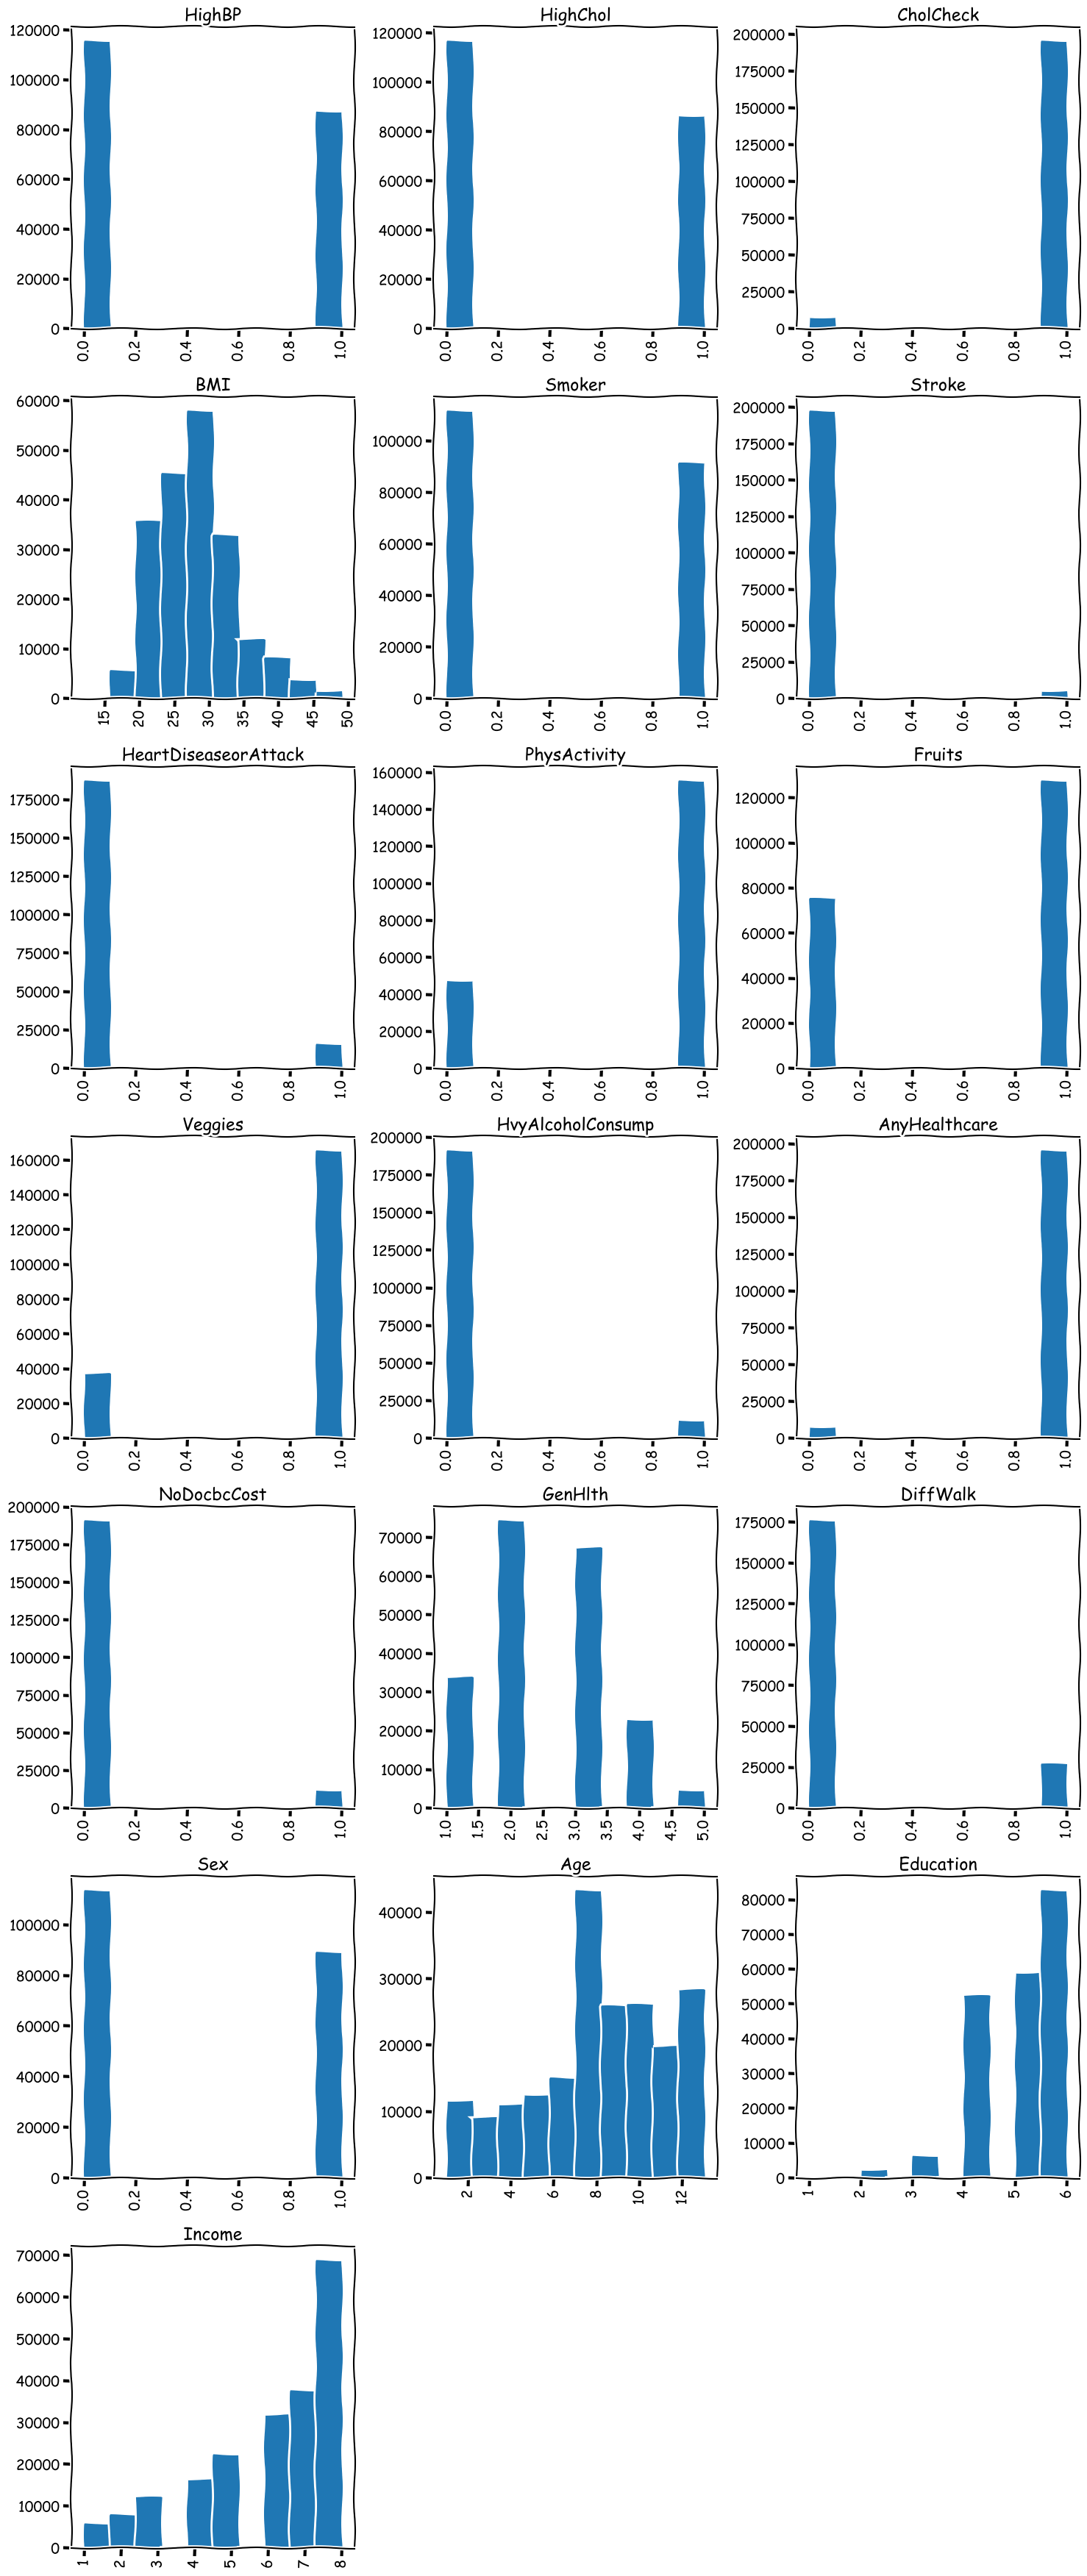

In [57]:
df_colsb = list(df_new.columns)[1:]
df_colsb

with plt.xkcd():
    plt.figure(figsize=(15,40))
    for i in range(len(df_colsb)):
        plt.subplot(8,3,i+1)
        plt.title(df_colsb[i])
        plt.xticks(rotation=90)
        plt.hist(df[df_colsb[i]])
        plt.tight_layout()
plt.savefig("columnasvis-over-under-norm.png")
plt.show()

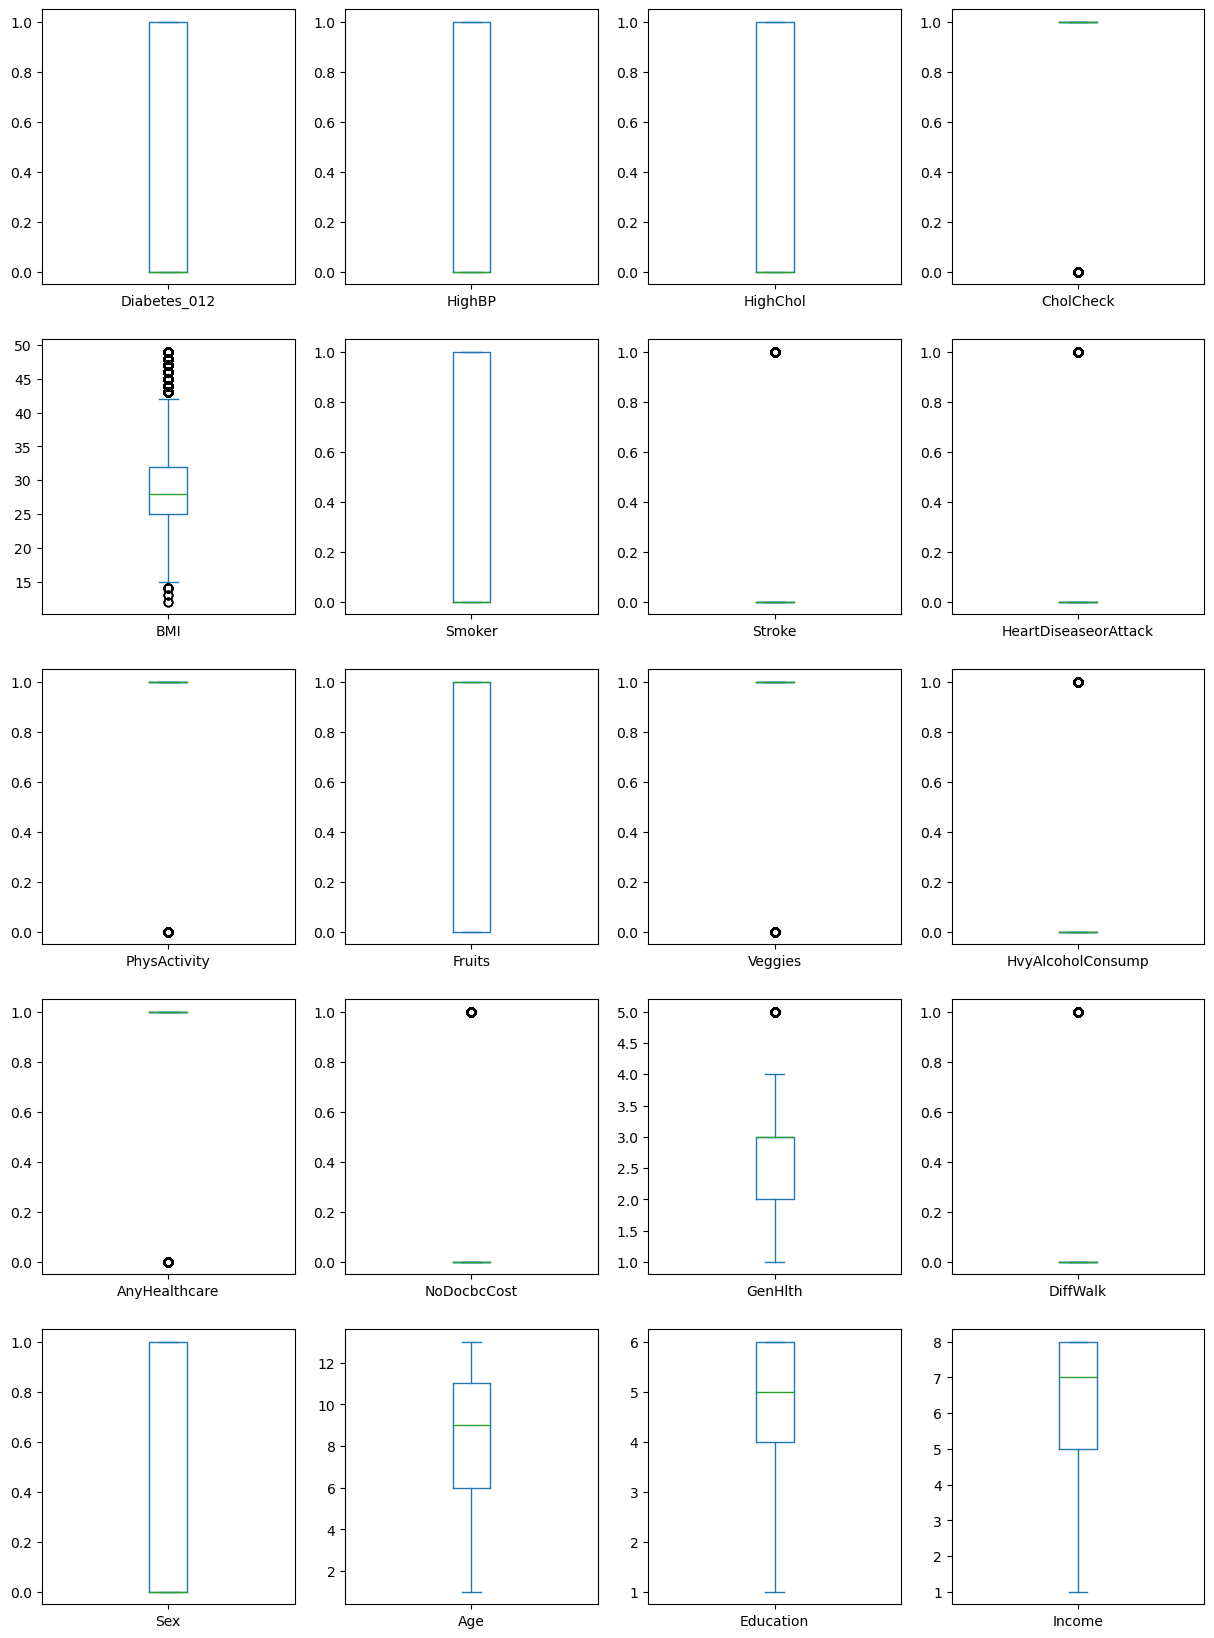

In [58]:
# nos encontramos muchos outliers, especialmente en BMI, con valores excesivos
df_new.plot(kind="box", subplots=True, layout=(6,4), figsize=(15,25));
plt.savefig("outliers-over-under-norm.png")

In [59]:
# Separamos los datos entre Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape},  y_test: {y_test.shape}")

X_train: (124978, 19), y_train: (124978, 1)
X_test: (53563, 19),  y_test: (53563, 1)


In [60]:
# Separamos los datos de Test entre Test y Validación
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.3, random_state = 42, stratify = y_test)

print(f"X_test: {X_test.shape}, y_train: {y_test.shape}")
print(f"X_val: {X_val.shape},  y_test: {y_val.shape}")

X_test: (37494, 19), y_train: (37494, 1)
X_val: (16069, 19),  y_test: (16069, 1)


Iniciando modelo 0


Informe sobre las métricas del modelo 0:
              precision    recall  f1-score   support

         0.0       0.79      0.89      0.84     26529
         1.0       0.62      0.44      0.51     10965

    accuracy                           0.76     37494
   macro avg       0.71      0.66      0.68     37494
weighted avg       0.74      0.76      0.74     37494

Confusion Matrix del modelo 0


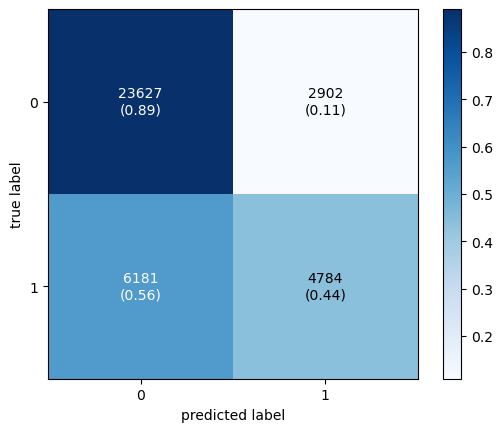

Generando DataFrame comparativo 0


Valores Reales  Valores Predichos  Valores_0_proba  Valores_1_proba
0                 0.0                0.0         0.531385         0.468615
1                 0.0                0.0         0.797998         0.202002
2                 0.0                0.0         0.977982         0.022018
3                 0.0                0.0         0.724819         0.275181
4                 0.0                0.0         0.870927         0.129073
...               ...                ...              ...              ...
37489             0.0                0.0         0.930702         0.069298
37490             1.0                0.0         0.530814         0.469186
37491             1.0                0.0         0.781452         0.218548
37492             1.0                1.0         0.357862         0.642138
37493             0.0                0.0         0.530261         0.469739

[37494 rows x 4 columns]

Iniciando modelo 1


Informe sobre las métricas del modelo 1:
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93     26529
         1.0       0.83      0.82      0.83     10965

    accuracy                           0.90     37494
   macro avg       0.88      0.88      0.88     37494
weighted avg       0.90      0.90      0.90     37494

Confusion Matrix del modelo 1


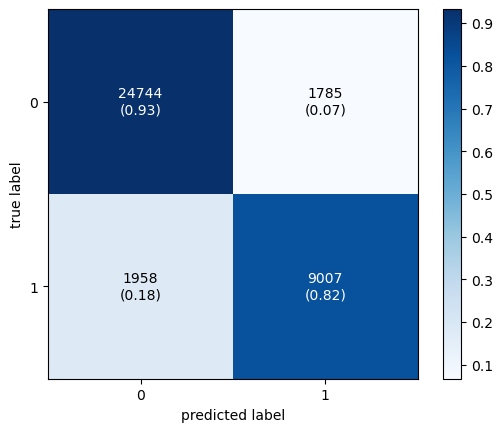

Generando DataFrame comparativo 1


Valores Reales  Valores Predichos  Valores_0_proba  Valores_1_proba
0                 0.0                0.0         0.930000         0.070000
1                 0.0                0.0         0.920000         0.080000
2                 0.0                0.0         1.000000         0.000000
3                 0.0                0.0         0.990000         0.010000
4                 0.0                0.0         0.923333         0.076667
...               ...                ...              ...              ...
37489             0.0                0.0         1.000000         0.000000
37490             1.0                1.0         0.220000         0.780000
37491             1.0                1.0         0.480000         0.520000
37492             1.0                1.0         0.030000         0.970000
37493             0.0                0.0         0.800000         0.200000

[37494 rows x 4 columns]

Columna: Diabetes_012 Importancia: 0.07042338066556877
Columna: HighBP Importancia: 0.033905927500626584
Columna: HighChol Importancia: 0.004847191159467581
Columna: CholCheck Importancia: 0.21935569607456765
Columna: BMI Importancia: 0.03772658888749831
Columna: Smoker Importancia: 0.010416583541552775
Columna: Stroke Importancia: 0.017171235040921246
Columna: HeartDiseaseorAttack Importancia: 0.03148394346419679
Columna: PhysActivity Importancia: 0.037063727337690804
Columna: Fruits Importancia: 0.02814467257841688
Columna: Veggies Importancia: 0.009503871671892795
Columna: HvyAlcoholConsump Importancia: 0.005887783059699521
Columna: AnyHealthcare Importancia: 0.0111462130766041
Columna: NoDocbcCost Importancia: 0.08492364122055436
Columna: GenHlth Importancia: 0.021007159485550042
Columna: DiffWalk Importancia: 0.02918724265876976
Columna: Sex Importancia: 0.15429943342394012
Columna: Age Importancia: 0.0788418921662477
Columna: Education Importancia: 0.11466381698623429
Iniciando m

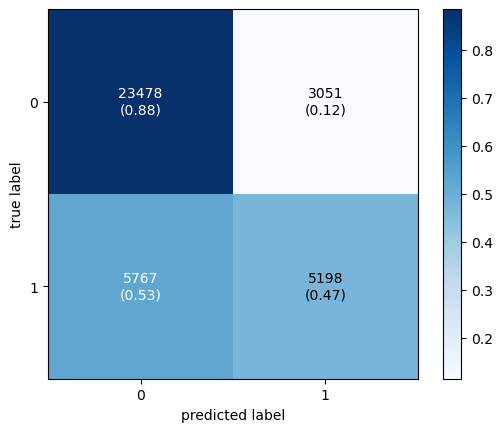

Generando DataFrame comparativo 2


Valores Reales  Valores Predichos  Valores_0_proba  Valores_1_proba
0                 0.0                1.0         0.499176         0.500824
1                 0.0                0.0         0.508786         0.491214
2                 0.0                0.0         0.522223         0.477777
3                 0.0                0.0         0.505950         0.494050
4                 0.0                0.0         0.508102         0.491898
...               ...                ...              ...              ...
37489             0.0                0.0         0.513022         0.486978
37490             1.0                1.0         0.499303         0.500697
37491             1.0                0.0         0.506183         0.493817
37492             1.0                1.0         0.498306         0.501694
37493             0.0                0.0         0.500673         0.499327

[37494 rows x 4 columns]

Columna: Diabetes_012 Importancia: 0.06
Columna: HighBP Importancia: 0.02
Columna: HighChol Importancia: 0.02
Columna: CholCheck Importancia: 0.32
Columna: BMI Importancia: 0.02
Columna: Smoker Importancia: 0.02
Columna: Stroke Importancia: 0.02
Columna: HeartDiseaseorAttack Importancia: 0.02
Columna: PhysActivity Importancia: 0.0
Columna: Fruits Importancia: 0.02
Columna: Veggies Importancia: 0.02
Columna: HvyAlcoholConsump Importancia: 0.02
Columna: AnyHealthcare Importancia: 0.02
Columna: NoDocbcCost Importancia: 0.14
Columna: GenHlth Importancia: 0.0
Columna: DiffWalk Importancia: 0.04
Columna: Sex Importancia: 0.18
Columna: Age Importancia: 0.0
Columna: Education Importancia: 0.06
Iniciando modelo 3


Informe sobre las métricas del modelo 3:
              precision    recall  f1-score   support

         0.0       0.92      0.93      0.93     26529
         1.0       0.84      0.81      0.82     10965

    accuracy                           0.90     37494
   macro avg       0.88  

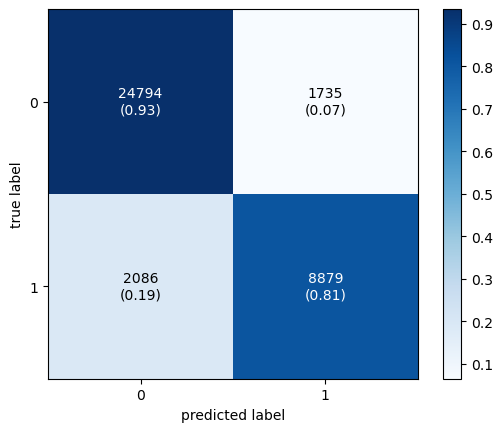

Generando DataFrame comparativo 3


Valores Reales  Valores Predichos  Valores_0_proba  Valores_1_proba
0                 0.0                0.0             1.00             0.00
1                 0.0                0.0             0.93             0.07
2                 0.0                0.0             1.00             0.00
3                 0.0                0.0             1.00             0.00
4                 0.0                0.0             1.00             0.00
...               ...                ...              ...              ...
37489             0.0                0.0             1.00             0.00
37490             1.0                1.0             0.00             1.00
37491             1.0                1.0             0.00             1.00
37492             1.0                1.0             0.00             1.00
37493             0.0                0.0             1.00             0.00

[37494 rows x 4 columns]

Columna: Diabetes_012 Importancia: 0.0685994578131389
Columna: HighBP Importancia: 0.039654091579622776
Columna: HighChol Importancia: 0.005356179883305992
Columna: CholCheck Importancia: 0.2356493933851887
Columna: BMI Importancia: 0.03229094269382128
Columna: Smoker Importancia: 0.00968829166306958
Columna: Stroke Importancia: 0.015548207133945042
Columna: HeartDiseaseorAttack Importancia: 0.026791820652652096
Columna: PhysActivity Importancia: 0.03213099553185451
Columna: Fruits Importancia: 0.025531017806932357
Columna: Veggies Importancia: 0.009359134616434683
Columna: HvyAlcoholConsump Importancia: 0.005542378527102221
Columna: AnyHealthcare Importancia: 0.010458886555623239
Columna: NoDocbcCost Importancia: 0.08789852423649677
Columna: GenHlth Importancia: 0.017900400253597116
Columna: DiffWalk Importancia: 0.02403776951399008
Columna: Sex Importancia: 0.1541736004789733
Columna: Age Importancia: 0.08501675820109991
Columna: Education Importancia: 0.11437214947315147
Iniciando m

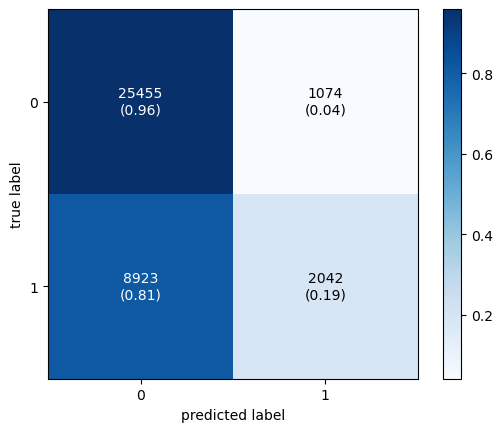

Generando DataFrame comparativo 4


Valores Reales  Valores Predichos  Valores_0_proba  Valores_1_proba
0                 0.0                0.0         0.535348         0.464652
1                 0.0                0.0         1.000000         0.000000
2                 0.0                0.0         1.000000         0.000000
3                 0.0                0.0         0.850969         0.149031
4                 0.0                0.0         0.927770         0.072230
...               ...                ...              ...              ...
37489             0.0                0.0         1.000000         0.000000
37490             1.0                0.0         0.713298         0.286702
37491             1.0                0.0         0.848317         0.151683
37492             1.0                0.0         0.740631         0.259369
37493             0.0                0.0         0.733594         0.266406

[37494 rows x 4 columns]

Iniciando modelo 5


Informe sobre las métricas del modelo 5:
              precision    recall  f1-score   support

         0.0       0.92      0.93      0.92     26529
         1.0       0.82      0.80      0.81     10965

    accuracy                           0.89     37494
   macro avg       0.87      0.86      0.87     37494
weighted avg       0.89      0.89      0.89     37494

Confusion Matrix del modelo 5


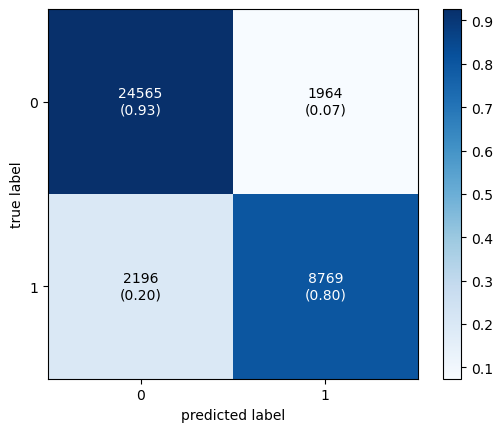

Generando DataFrame comparativo 5


Valores Reales  Valores Predichos  Valores_0_proba  Valores_1_proba
0                 0.0                0.0         0.784316         0.215684
1                 0.0                0.0         0.993793         0.006207
2                 0.0                0.0         0.998995         0.001005
3                 0.0                0.0         0.980339         0.019661
4                 0.0                0.0         0.914095         0.085905
...               ...                ...              ...              ...
37489             0.0                0.0         0.995232         0.004768
37490             1.0                1.0         0.071123         0.928877
37491             1.0                0.0         0.667693         0.332307
37492             1.0                1.0         0.062268         0.937732
37493             0.0                0.0         0.841817         0.158183

[37494 rows x 4 columns]

Columna: Diabetes_012 Importancia: 0.12592544351517515
Columna: HighBP Importancia: 0.031031778156056858
Columna: HighChol Importancia: 0.0047586669143664315
Columna: CholCheck Importancia: 0.17237455857785297
Columna: BMI Importancia: 0.03829237914818376
Columna: Smoker Importancia: 0.010935019411221904
Columna: Stroke Importancia: 0.020970024922351505
Columna: HeartDiseaseorAttack Importancia: 0.03357897025924078
Columna: PhysActivity Importancia: 0.035922387912878904
Columna: Fruits Importancia: 0.029790839903591902
Columna: Veggies Importancia: 0.010691949105512199
Columna: HvyAlcoholConsump Importancia: 0.007046308781710966
Columna: AnyHealthcare Importancia: 0.012498063857037686
Columna: NoDocbcCost Importancia: 0.09395892514311274
Columna: GenHlth Importancia: 0.024625929027626333
Columna: DiffWalk Importancia: 0.03376094762209185
Columna: Sex Importancia: 0.12930873616058727
Columna: Age Importancia: 0.07401419934948762
Columna: Education Importancia: 0.11051487223191332


In [61]:
# Ejecutamos todos los modelos seguidos:
#  SVC(probability = True), KNeighborsClassifier(n_neighbors = 5, p = 2),DecisionTreeClassifier(max_depth = 3)

model = {}
yhat = {}

accuracy = {}
recall = {}
precision = {}

accuracies = {}
recalls = {}
precisions = {}

classificationreport = {}
cm = {}
pred_df = {}
proba = {}
df_proba = {}

algoritmos = {0:LogisticRegression(),
              1:RandomForestClassifier(), 
              2:AdaBoostClassifier(),
              3:ExtraTreesClassifier(), 
              4:SGDClassifier(loss="modified_huber", penalty="l2", max_iter=5), 
              5:GradientBoostingClassifier(max_depth=14)}

for i in range(len(algoritmos)):
    
    print(f'Iniciando modelo {i}')
    model[i]= algoritmos[i]
    model[i].fit(X_train, y_train)
    
    yhat[i] = model[i].predict(X_test)

    # Calculando las métricas del modelo:
    accuracy[i] = accuracy_score(y_test, yhat[i])
    precision[i] = precision_score(y_test, yhat[i], average = "macro")
    recall[i] = recall_score(y_test, yhat[i], average = "macro")

    accuracies[f'modelo {i}'] = accuracy[i]
    recalls[f'modelo {i}'] = recall[i]
    precisions[f'modelo {i}'] = precision[i]

    # Calculando classification report:
    classificationreport[i] = classification_report(y_test, yhat[i]) 

    # Informando:
    print("\n")
    print(f"Informe sobre las métricas del modelo {i}:")
    print(classificationreport[i])
    print(f'Confusion Matrix del modelo {i}')

    # Calculando y visualizando la "confusion matrix":
    cm[i] = confusion_matrix(y_test, yhat[i])
    plot_confusion_matrix(conf_mat=cm[i],show_absolute=True,
                                    show_normed=True,
                                    colorbar=True)
    plt.savefig(f"coma{i}.png")
    plt.show()
    
    print(f'Generando DataFrame comparativo {i}')
    pred_df[i] = pd.DataFrame()
    pred_df[i]['Valores Reales'] = y_test
    pred_df[i]['Valores Predichos'] = yhat[i]
    
    try:
        proba[i] = model[i].predict_proba(X_test)
        df_proba[i] = pd.DataFrame(proba[i], columns=['Valores_0_proba', 'Valores_1_proba'])
        pred_df[i] = pd.concat([pred_df[i].reset_index(drop=True), df_proba[i]], axis=1)
        
    except:
        pass
    
    display(pred_df[i])
    
    try:
        model[i].feature_importances_
        for col, imp in zip(df_new, model[i].feature_importances_):
            print(f"Columna: {col} Importancia: {imp}")
    except:
        pass


In [61]:
model[3].get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [62]:
model[3].get_params().values()


dict_values([False, 0.0, None, 'gini', None, 'auto', None, None, 0.0, 1, 2, 0.0, 100, None, False, None, 0, False])

In [63]:
for i in range(100):
    print(model[3].estimators_[i].min_samples_split)
    

2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


In [64]:

for i in range(100):
    print(model[3].estimators_[i].get_depth())

38
41
39
36
42
37
37
39
39
40
43
41
37
39
40
40
39
37
39
38
38
37
35
38
38
39
38
38
38
37
40
39
38
38
40
38
40
39
39
39
40
39
38
38
41
40
37
38
39
38
40
39
38
37
39
38
38
39
43
39
40
40
40
38
37
40
39
38
40
36
39
39
39
39
37
38
38
40
38
38
36
38
38
42
41
39
38
37
38
39
39
39
38
38
38
38
38
39
38
37


In [65]:
for i in range(100):
    print(model[3].estimators_[i].get_n_leaves())

40674
40671
40109
39963
40327
40278
40222
40419
40547
40575
40447
40522
40224
40376
40455
40387
39919
39960
40301
40363
40154
39985
39686
40057
40238
40221
39994
40135
40211
40147
40298
40528
40372
40313
40783
40248
40044
40436
39893
40526
40133
40866
40466
40123
39998
39926
40234
40301
40434
39990
40700
40054
40296
40113
40412
40341
40533
40518
40443
40606
40079
40463
40282
40233
40121
40147
40413
40247
40290
40472
40733
40486
40286
39961
40402
40279
40684
40054
40810
40260
40260
40705
40492
40204
40513
40355
40711
40446
40046
40552
39656
40708
40289
40243
40232
40582
40439
40239
40467
40353


#  Validación

In [66]:
model[1]

RandomForestClassifier()

## Tuning  GridSearchCV

In [67]:
# %%time

# modela= model[1]
# modela

# params = {"n_estimators"           : [100, 150, 200], # Numero de arboles
#           "criterion"              : ["gini", "entropy"], # Es la función para medir la calidad de una división/split.
#           "max_depth"              : [25, 30, 35, 40], # La profundidad máxima del árbol.
#           "max_features"           : ["auto", "log2"], # El número de características (atributos) a considerar en cada split
#           "max_leaf_nodes"         : [25000, 26000, 27000], # Maximo de nodos hoja del arbol
# #           "min_impurity_decrease"  : [0.01, 0.1], # Un nodo se dividirá si esta división induce una disminución de la impureza mayor o igual a este valor.
# #           "min_samples_split"      : [200, 500]
#          } # El número mínimo de muestras requeridas para llegar a nodo hoja.

# scorers = {"f1_macro", "accuracy", "recall_macro" , "recall", "recall_weighted"}

# grid_solver = GridSearchCV(estimator  = modela    , 
#                            param_grid = params   , 
#                            scoring    = scorers  ,
#                            cv         = 10        ,
#                            refit      = "recall_weighted",
#                            n_jobs     = -1   ,     
#                            verbose    = 1)

# modela_result = grid_solver.fit(X_train, y_train)

# print(modela_result.cv_results_["mean_test_recall_macro"].mean())
# print(modela_result.cv_results_["mean_test_recall"].mean()) #se puede quitar
# print(modela_result.cv_results_["mean_test_f1_macro"].mean())
# print(modela_result.cv_results_["mean_test_accuracy"].mean())
# print(modela_result.cv_results_["mean_test_recall_weighted"].mean())

# print("*"*100)

# print(modela_result.best_score_)
# print(modela_result.best_params_)


Resultados Grid Search CV para Random Forest (model[1]), con datos tratados con Isolation Forest (contamination 0,08) y 19 features:
    
        Fitting 10 folds for each of 144 candidates, totalling 1440 fits
        0.8630972770055999
        0.797257178710423
        0.8656635848053155
        0.8915769722040731
        0.8915769722040731
        ****************************************************************************************************
        0.8925154169111028
        {'criterion': 'entropy', 'max_depth': 30, 'max_features': 'auto', 'max_leaf_nodes': 26000, 'n_estimators': 150}
        Wall time: 5h 7min 58s

Resultados Grid Search CV para Random Forest (model[3]), 
con datos tratados con Isolation Forest (contamination 1) y 19 features:

        0.5865910291625075
        0.503237022940424
        0.5865897092688852
        ****************************************************************************************************
        0.6847506940105458
        {'criterion': 'entropy', 'max_depth': 30, 'max_features': 'auto', 'max_leaf_nodes': 8, 
        'min_impurity_decrease': 0.01, 'min_samples_split': 5, 'n_estimators': 100}
        Wall time: 1h 45min 8s


Resultados Grid Search CV para Extra Tree Classifier (model7),  
con datos tratados con Isolation Forest (contamination 0,08) y 22 features:

        0.5949391303832817
        0.5112455682650394
        0.5949391303832817
        ****************************************************************************************************
        0.6941112976733029
        {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'log2', 'max_leaf_nodes': 8, 
        'min_impurity_decrease': 0.02, 'min_samples_split': 2, 'n_estimators': 500}
        Wall time: 3h 40min 12s

In [68]:
model[3]

ExtraTreesClassifier()

In [69]:
for i in range(100):
    print(model[3].estimators_[i].min_samples_leaf)
    

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [70]:
# %%time

# modelo = model[3]
# modelo
# #  parametros Extra Tress Classifier:
# # 'ccp_alpha', 0.0
# # 'class_weight', None
# # 'criterion', 'gini'
# # 'max_depth', None
# # 'max_features',  'auto'
# # 'max_leaf_nodes', None
# # 'min_impurity_decrease', 0.0
# # 'min_samples_leaf', 1
# # 'min_samples_split', 2
# # 'min_weight_fraction_leaf',  0.0
# # 'random_state', 1294109415
# # 'splitter':'best'

# params = {"n_estimators"           : [10, 20, 30, 40],
#           "bootstrap"              : [False],
# #           "oob_score"              : [True],
#           "min_samples_leaf"       : [1, 2],
#           "min_samples_split"      : [2, 3],
#           "criterion"              : ["gini", "entropy", "log_loss"], # Es la función para medir la calidad de una división/split.
#           "max_depth"              : [ None], # La profundidad máxima del árbol.
#           "max_features"           : ['sqrt','log2'], # El número de características (atributos) a considerar en cada split
#           "max_leaf_nodes"         : [30000, 40000, 50000]} # Maximo de nodos hoja del arbol

# #           "min_impurity_decrease"  : [0.001, 0.01], # Un nodo se dividirá si esta división induce una disminución de la impureza mayor o igual a este valor.
# #           "min_samples_split"      : [2, 5, 7]} # El número mínimo de muestras requeridas para llegar a nodo hoja.

# scorers = {"f1_macro", "accuracy", "recall_macro" , "recall", "recall_weighted"}

# grid_solver = GridSearchCV(estimator  = modelo    , 
#                            param_grid = params   , 
#                            scoring    = scorers  ,
#                            cv         = 5      ,
#                            refit      = "recall_weighted",
#                            n_jobs     = -1   , 
#                            verbose    = 1)

# modelo_result = grid_solver.fit(X_train, y_train)

# print(modelo_result.cv_results_["mean_test_recall_macro"].mean())
# print(modelo_result.cv_results_["mean_test_recall"].mean()) #se puede quitar
# print(modelo_result.cv_results_["mean_test_f1_macro"].mean())
# print(modelo_result.cv_results_["mean_test_accuracy"].mean())
# print(modelo_result.cv_results_["mean_test_recall_weighted"].mean())

# print("*"*100)

# print(modelo_result.best_score_)
# print(modelo_result.best_params_)


        Fitting 5 folds for each of 324 candidates, totalling 1620 fits
        nan
        nan
        nan
        nan
        nan
        ****************************************************************************************************
        0.8824259712699292
        {'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'max_leaf_nodes': 30000, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 20}
        Wall time: 14min 52s

        Fitting 5 folds for each of 144 candidates, totalling 720 fits
        nan
        nan
        nan
        nan
        nan
        ****************************************************************************************************
        0.881665519512028
        {'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': 30000, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 15}
        Wall time: 6min 30s


        Fitting 5 folds for each of 432 candidates, totalling 2160 fits
        nan
        nan
        nan
        nan
        nan
        ****************************************************************************************************
        0.8803929330658036
        {'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': 40000, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 10}
        Wall time: 8min 48s

kf = StratifiedKFold(n_splits = 5)
cv = kf
    
        Fitting 5 folds for each of 288 candidates, totalling 1440 fits
        nan
        nan
        nan
        nan
        nan
        ****************************************************************************************************
        0.8269057440798729
        {'criterion': 'entropy', 'max_depth': 35, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_samples_leaf': 3, 
        'min_samples_split': 3}
        Wall time: 1h 23min 38s


Resultados de Grid Search CV para Extra Trees Classifier, 
con datos tratados con Isolation Forest (contamination 0,09) y 19 features:

        Fitting 5 folds for each of 288 candidates, totalling 1440 fits
        nan
        nan
        nan
        nan
        nan
        ****************************************************************************************************
        0.8270066134060767
        {'criterion': 'entropy', 'max_depth': 45, 'max_features': 'auto', 'max_leaf_nodes': 35000, 'min_samples_leaf': 3, 
        'min_samples_split': 3}
        Wall time: 1h 22min 24s

Resultados de Grid Search CV para Extra Trees Classifier, con datos tratados con Isolation Forest (contamination 1) y 19 features:

"min_samples_leaf"[100, 150, 200],
min_samples_split" [100, 200, 300]

        Fitting 5 folds for each of 486 candidates, totalling 2430 fits
        nan
        nan
        nan
        nan
        nan
        ****************************************************************************************************
        0.7651986751051638
        {'criterion': 'gini', 'max_depth': 40, 'max_features': 'log2', 'max_leaf_nodes': 43000, 'min_samples_leaf': 100,
        'min_samples_split': 100}
        Wall time: 1h 59min 12s



Resultados de Grid Search CV para Random Forest, 
con datos tratados con Isolation Forest (contamination 1) y 19 features:

        0.6952769756609821
        0.694789286264485
        0.6952771605965439
        ****************************************************************************************************
        0.7058040898235741
        {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': 8, 
        'min_impurity_decrease': 0.01, 'min_samples_split': 5, 'n_estimators': 200}
        Wall time: 1h 40min 10s

In [71]:
df

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                0.0     1.0       1.0        1.0  40.0     1.0     0.0   
3                0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                0.0     1.0       1.0        1.0  24.0     0.0     0.0   
5                0.0     1.0       1.0        1.0  25.0     1.0     0.0   
6                0.0     1.0       0.0        1.0  30.0     1.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
253674           0.0     0.0       0.0        1.0  27.0     0.0     0.0   
253675           0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253677           0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678           0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679           1.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  \
0                        0.0           0.0     0.0      1.0   
3                        0.0           1.0     1.0      1.0   
4                        0.0           1.0     1.0      1.0   
5                        0.0           1.0     1.0      1.0   
6                        0.0           0.0     0.0      0.0   
...                      ...           ...     ...      ...   
253674                   0.0           0.0     0.0      1.0   
253675                   0.0           0.0     1.0      1.0   
253677                   0.0           1.0     1.0      0.0   
253678                   0.0           0.0     1.0      1.0   
253679                   1.0           1.0     1.0      0.0   

        HvyAlcoholConsump  AnyHealthcare  NoDocbcCost  GenHlth  DiffWalk  Sex  \
0                     0.0            1.0          0.0      5.0       1.0  0.0   
3                     0.0            1.0          0.0      2.0       0.0  0.0   
4                     0.0            1.0          0.0      2.0       0.0  0.0   
5                     0.0            1.0          0.0      2.0       0.0  1.0   
6                     0.0            1.0          0.0      3.0       0.0  0.0   
...                   ...            ...          ...      ...       ...  ...   
253674                0.0            1.0          0.0      1.0       0.0  0.0   
253675                0.0            1.0          0.0      3.0       0.0  1.0   
253677                0.0            1.0          0.0      1.0       0.0  0.0   
253678                0.0            1.0          0.0      3.0       0.0  1.0   
253679                0.0            1.0          0.0      2.0       0.0  0.0   

         Age  Education  Income  
0        9.0        4.0     3.0  
3       11.0        3.0     6.0  
4       11.0        5.0     4.0  
5       10.0        6.0     8.0  
6        9.0        6.0     7.0  
...      ...        ...     ...  
253674   3.0        6.0     5.0  
253675   5.0        6.0     7.0  
253677   2.0        5.0     2.0  
253678   7.0        5.0     1.0  
253679   9.0        6.0     2.0  

[203001 rows x 20 columns]

In [72]:
# Creamos un dataframe con las estadísticas de los 9 modelos:

df_accuracy = pd.DataFrame(accuracies.items(), columns=['Model', 'Accuracy'])

df_recalls = pd.DataFrame(recalls.items(), columns=['Model', 'Recall'])

df_precisions = pd.DataFrame(precisions.items(), columns=['Model', 'Precision'])

df_metricas = pd.DataFrame(algoritmos.items(), columns= ['Model','Model Name'])


df_mets = pd.merge(left = df_accuracy, right = df_recalls, left_on= "Model", right_on= "Model")
df_metrics = pd.merge(left = df_mets, right = df_precisions, left_on= "Model", right_on ="Model")
df_metrics["Model Name"] = df_metricas['Model Name'].apply(lambda x : str(x))
df_metrics["Model parameters"] = df_metricas['Model Name']
df_metrics.sort_values(by= ['Recall'], inplace= True, ascending= False)
df_metrics


Model  Accuracy    Recall  Precision  \
1  modelo 1  0.894737  0.869983   0.872315   
3  modelo 3  0.894764  0.866142   0.874473   
5  modelo 5  0.885688  0.858634   0.861346   
2  modelo 2  0.758580  0.668775   0.703515   
0  modelo 0  0.753654  0.653766   0.697164   
4  modelo 4  0.745114  0.633112   0.684846   

                                         Model Name  \
1                          RandomForestClassifier()   
3                            ExtraTreesClassifier()   
5          GradientBoostingClassifier(max_depth=14)   
2                              AdaBoostClassifier()   
0                              LogisticRegression()   
4  SGDClassifier(loss='modified_huber', max_iter=5)   

                                    Model parameters  
1  (DecisionTreeClassifier(max_features='auto', r...  
3  (ExtraTreeClassifier(random_state=119673892), ...  
5  ([DecisionTreeRegressor(criterion='friedman_ms...  
2  (DecisionTreeClassifier(max_depth=1, random_st...  
0                               LogisticRegression()  
4   SGDClassifier(loss='modified_huber', max_iter=5)

<ul>
    algoritmos

    modelo 0 LogisticRegression
    modelo 1 RandomForestClassifier
    modelo 2 AdaBoostClassifier
    modelo 3 ExtraTreesClassifier
    modelo 4 SGDClassifier
    modelo 5 XGBClassifier
</ul>

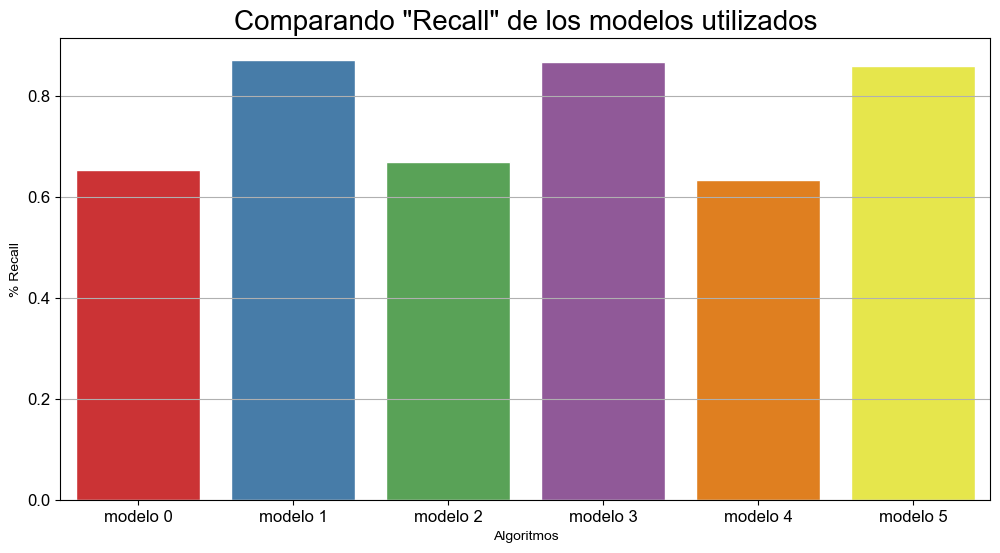

In [73]:

plt.figure(figsize = (12,6))
plt.grid(True)
sns.set_style("whitegrid")
sns.barplot(x=list(recalls.keys()), y=list(recalls.values()), palette="Set1")
plt.title('Comparando "Recall" de los modelos utilizados', fontsize = 20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel("% Recall")
plt.xlabel("Algoritmos")

plt.savefig("com-recall.png")
plt.show()

### Para terminar, vamos a probar el modelo con datos completamente nuevos y vamos explicar el desempeño del modelo y que alternativas podemos tomar para mejorar el desempeño del modelo.

In [74]:
# Calculamos todas las predicciones con valores nuevos:

accuraciesval={}
precisionsval={}
recallsval={}
predictions={}
classificationreportval={}


for i in range(len(algoritmos)):  

    # Haciendo las predicciones
    predictions[i] = model[i].predict(X_val)
    predictions[i]
    # Calculando las métricas del modelo:
    accuracy[i] = accuracy_score(y_val, predictions[i])
    precision[i] = precision_score(y_val, predictions[i], average = "macro")
    recall[i] = recall_score(y_val, predictions[i], average = "macro")

    accuraciesval[f'modelo{i}'] = accuracy[i]
    recallsval[f'modelo{i}'] = recall[i]
    precisionsval[f'modelo{i}'] = precision[i]

    # Calculando classification report:
    classificationreportval[i] = classification_report(y_val, predictions[i]) 

    # Informando:
    print("\n")
    print(f'Informe sobre las métricas del modelo {i}:')
    print("\n")
    print(classificationreportval[i])
    
display(accuraciesval, precisionsval, recallsval)



Informe sobre las métricas del modelo 0:


              precision    recall  f1-score   support

         0.0       0.79      0.89      0.84     11407
         1.0       0.61      0.42      0.49      4603

    accuracy                           0.75     16010
   macro avg       0.70      0.65      0.67     16010
weighted avg       0.74      0.75      0.74     16010



Informe sobre las métricas del modelo 1:


              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93     11407
         1.0       0.82      0.82      0.82      4603

    accuracy                           0.90     16010
   macro avg       0.87      0.87      0.87     16010
weighted avg       0.90      0.90      0.90     16010



Informe sobre las métricas del modelo 2:


              precision    recall  f1-score   support

         0.0       0.80      0.88      0.84     11407
         1.0       0.61      0.45      0.52      4603

    accuracy                           0.76    

{'modelo0': 0.7547158026233604,
 'modelo1': 0.8965021861336665,
 'modelo2': 0.7594003747657714,
 'modelo3': 0.8973766396002498,
 'modelo4': 0.7472204871955028,
 'modelo5': 0.8866958151155527}

{'modelo0': 0.699074398803287,
 'modelo1': 0.8743952539646058,
 'modelo2': 0.7050692484314902,
 'modelo3': 0.8772991208186223,
 'modelo4': 0.688293582370034,
 'modelo5': 0.862375098192018}

{'modelo0': 0.6535133769639336,
 'modelo1': 0.8722958950106312,
 'modelo2': 0.6669083958321973,
 'modelo3': 0.8700587019633275,
 'modelo4': 0.6362669148598035,
 'modelo5': 0.8602955817537059}

In [75]:
model

{0: LogisticRegression(),
 1: RandomForestClassifier(),
 2: AdaBoostClassifier(),
 3: ExtraTreesClassifier(),
 4: SGDClassifier(loss='modified_huber', max_iter=5),
 5: GradientBoostingClassifier(max_depth=14)}

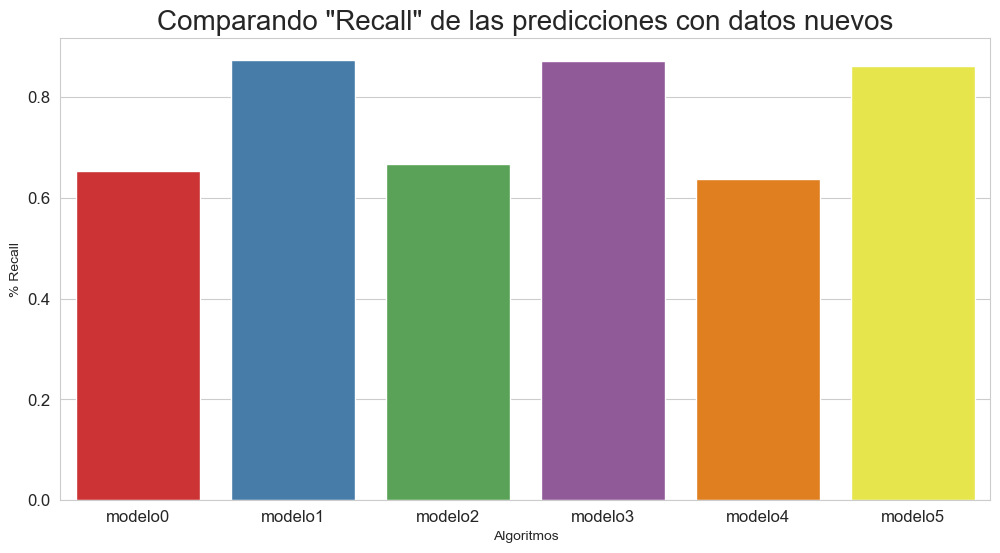

In [76]:
# Comparando la "Accuracy" de las predicciones con datos nuevos:

plt.figure(figsize = (12,6))
plt.grid(True)
sns.set_style("whitegrid")
# sns.barplot(x=list(accuraciesval.keys(),), y=list(accuraciesval.values()), palette="Set1")
sns.barplot(x=list(recallsval.keys()), y=list(recallsval.values()), palette="Set1")
# sns.barplot(x=list(precisionsval.keys()), y=list(precisionsval.values()), palette="Set1")
plt.title('Comparando "Recall" de las predicciones con datos nuevos', fontsize = 20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel("% Recall")
plt.xlabel("Algoritmos")

plt.savefig("new-recall.png")
plt.show()

In [77]:
fin = time.time()
print(fin-inicio)

436.69137954711914


In [ ]:
##############################################################################################################################